In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
import soccerdata as sd
import socceraction.vaep.features as features
import socceraction.vaep.labels as labels
import socceraction.vaep.formula as formula
import utils
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from mplsoccer import Pitch
import warnings

warnings.filterwarnings("ignore")

[08/29/23 19:10:28] INFO     No custom team name replacements found. You can configure these in       ]8;id=343637;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=897425;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\_config.py#84\84]8;;\
                             C:\Users\aleex\soccerdata\config\teamname_replacements.json.                          

                    INFO     Custom league dict loaded from                                          ]8;id=302634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=737066;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\_config.py#160\160]8;;\
                             C:\Users\aleex\soccerdata\config\league_dict.json.                                    

In [2]:
comp = "ESP-La Liga"
season = 2022


ws = sd.WhoScored(leagues=comp, seasons=season)
games = ws.read_schedule()

[08/29/23 19:10:32] INFO     Saving cached data to C:\Users\aleex\soccerdata\data\WhoScored           ]8;id=600321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=571686;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\_common.py#89\89]8;;\

[08/29/23 19:10:51] INFO     patching driver executable                                              ]8;id=839263;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\undetected_chromedriver\patcher.py\patcher.py]8;;\:]8;id=166363;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\undetected_chromedriver\patcher.py#346\346]8;;\
                             C:\Users\aleex\appdata\roaming\undetected_chromedriver\undetected_chrom               
                             edriver.exe                                                                           

[08/29/23 19:10:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=949680;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=392258;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

In [3]:
matches = list(games.game_id.unique())

In [4]:
len(matches)

380

In [5]:
df_events = pd.DataFrame()
df_teams = pd.DataFrame()
df_players = pd.DataFrame()
it = 0
for m in matches:
    it +=1
    print("{:.0f} / {:.0f}".format(it,len(matches)))
    events, teams, players = utils.sd_match_events_spadl(comp, season, int(m), ws)
    teams['game_id'] = m
    df_events = pd.concat([df_events, events])
    df_teams = pd.concat([df_teams, teams])
    df_players = pd.concat([df_players, players])

1 / 380


[08/29/23 19:10:54] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=244857;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=11722;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=395360;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=540927;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=633191;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=208993;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650634                                 ]8;id=48118;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=287686;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

2 / 380


[08/29/23 19:10:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=122564;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=403436;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=101541;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=969009;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=154068;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=186264;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650630                                 ]8;id=92200;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=946475;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

3 / 380


[08/29/23 19:10:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=356025;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=625584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=112117;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=199844;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=676354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=208304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650632                                 ]8;id=574808;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=107591;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

4 / 380


[08/29/23 19:11:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=21614;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=417502;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=919899;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=378923;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=943942;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=135399;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650637                                 ]8;id=183089;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=496483;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

5 / 380


[08/29/23 19:11:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=910401;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=519313;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=548922;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=663573;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=481525;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=892092;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650635                                 ]8;id=809767;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=122837;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

6 / 380


[08/29/23 19:11:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=834990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=432914;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=272024;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=635385;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=943942;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=225558;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:06] INFO     [1/1] Retrieving game with id=1650633                                 ]8;id=718651;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=867230;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

7 / 380


[08/29/23 19:11:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=321155;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=503912;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=172459;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=607563;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=722980;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=639607;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:08] INFO     [1/1] Retrieving game with id=1650638                                 ]8;id=75661;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=684719;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

8 / 380


[08/29/23 19:11:09] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=288217;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=47953;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=374657;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=143846;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=900152;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=393656;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:10] INFO     [1/1] Retrieving game with id=1650629                                 ]8;id=958174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=162800;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

9 / 380


[08/29/23 19:11:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=145513;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=537404;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=459693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=223660;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=263271;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=553875;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650636                                 ]8;id=757091;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=469105;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

10 / 380


[08/29/23 19:11:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=418149;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=987542;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=748736;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=192662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=165235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=746828;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650631                                 ]8;id=65555;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=507410;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

11 / 380


[08/29/23 19:11:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=642966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=546939;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=370537;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=414454;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=57027;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=415832;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650562                                 ]8;id=557989;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=993605;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

12 / 380


[08/29/23 19:11:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=830554;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=866349;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=932719;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=805395;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=757474;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=374620;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650563                                 ]8;id=964824;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=444948;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

13 / 380


[08/29/23 19:11:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=760580;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=939647;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=248053;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=633476;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=814908;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=89711;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650561                                 ]8;id=135990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=778711;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

14 / 380


[08/29/23 19:11:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=483347;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=808961;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=778865;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=317005;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=156247;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=26013;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650565                                 ]8;id=54779;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=234397;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

15 / 380


[08/29/23 19:11:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=627050;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=834039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=899597;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=709718;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=299758;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=200244;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650567                                 ]8;id=144282;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=865097;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

16 / 380


[08/29/23 19:11:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=992462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=951481;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=751614;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=930748;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=543000;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=208466;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650559                                 ]8;id=755268;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=730391;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

17 / 380


[08/29/23 19:11:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=551235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=299906;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=271549;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=586858;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=45569;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=318488;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:44] INFO     [1/1] Retrieving game with id=1650560                                 ]8;id=858354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=682559;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

18 / 380


[08/29/23 19:11:48] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=560143;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=419990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=361645;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=586731;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=896522;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=214669;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650564                                 ]8;id=379229;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=943613;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

19 / 380


[08/29/23 19:11:52] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=527737;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=815547;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=159185;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=728546;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=187872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=558965;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650568                                 ]8;id=608628;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=141872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

20 / 380


[08/29/23 19:11:57] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=896237;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=707665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=704856;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=486490;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:11:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=17310;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=916369;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650566                                 ]8;id=179356;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=100133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

21 / 380


[08/29/23 19:12:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=768752;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=822129;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=602877;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=95824;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=553135;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=367121;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650577                                 ]8;id=63837;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=962990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

22 / 380


[08/29/23 19:12:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=573419;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=449191;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=259118;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=622363;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=489391;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=307096;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650570                                 ]8;id=98413;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=242753;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

23 / 380


[08/29/23 19:12:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=789309;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=847256;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=865480;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=506244;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=497138;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=358205;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650574                                 ]8;id=531438;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=214217;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

24 / 380


[08/29/23 19:12:09] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=211504;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=818076;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=715665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=114577;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=594111;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=125788;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650571                                 ]8;id=997786;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=752194;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

25 / 380


[08/29/23 19:12:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=757923;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=721015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=448425;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=341799;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=523877;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=679434;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650578                                 ]8;id=359281;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=906819;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

26 / 380


[08/29/23 19:12:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=109128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=532775;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=279988;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=290731;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=809631;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=149229;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:15] INFO     [1/1] Retrieving game with id=1650569                                 ]8;id=321267;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=867522;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

27 / 380


[08/29/23 19:12:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=9017;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=313177;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=361708;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=257576;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=48885;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=435758;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:17] INFO     [1/1] Retrieving game with id=1650573                                 ]8;id=644920;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=282522;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

28 / 380


[08/29/23 19:12:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=433475;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=228549;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=873037;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=629593;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=527887;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=860070;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:19] INFO     [1/1] Retrieving game with id=1650572                                 ]8;id=646074;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=951217;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

29 / 380


[08/29/23 19:12:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=66994;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=987450;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=754532;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=475181;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=535713;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=774117;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650575                                 ]8;id=621521;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=28494;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

30 / 380


[08/29/23 19:12:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=146745;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=923293;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=107009;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=809393;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=363362;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=217280;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650576                                 ]8;id=705772;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=767285;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

31 / 380


[08/29/23 19:12:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=466903;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=994752;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=352867;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=318565;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=199443;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=891212;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650586                                 ]8;id=608772;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=907274;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

32 / 380


[08/29/23 19:12:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=117393;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=88259;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=578001;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=801820;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=651189;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=209801;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650588                                 ]8;id=872478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=877893;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

33 / 380


[08/29/23 19:12:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=540079;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=476690;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=204438;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=848005;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=989860;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=884608;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650583                                 ]8;id=343113;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=335295;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

34 / 380


[08/29/23 19:12:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=558246;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=839351;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=791959;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=469044;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=201124;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=426588;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650581                                 ]8;id=818870;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=498516;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

35 / 380


[08/29/23 19:12:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=695548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=390141;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=283233;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=739079;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=944039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=400612;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650582                                 ]8;id=780579;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=881440;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

36 / 380


[08/29/23 19:12:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=478008;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=930002;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=46238;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=788190;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=567812;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=115586;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650579                                 ]8;id=172740;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=222493;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

37 / 380


[08/29/23 19:12:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=578415;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=719211;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=981448;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=909183;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=430625;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=309958;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650580                                 ]8;id=20690;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=769628;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

38 / 380


[08/29/23 19:12:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=500641;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=631870;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=199170;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=448057;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=599943;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=254094;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650585                                 ]8;id=971552;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=4439;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

39 / 380


[08/29/23 19:12:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=560565;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=301527;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=725106;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=857819;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=336242;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=104916;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650584                                 ]8;id=874996;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=633373;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

40 / 380


[08/29/23 19:12:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=417569;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=230795;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=526633;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=230842;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=735842;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=804460;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650587                                 ]8;id=205551;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=200785;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

41 / 380


[08/29/23 19:12:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=98353;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=177515;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=655270;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=957846;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=69302;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=809198;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650595                                 ]8;id=378581;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=823017;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

42 / 380


[08/29/23 19:12:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=660085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=259038;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=274362;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=446532;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=320472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=37833;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650589                                 ]8;id=378311;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=188905;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

43 / 380


[08/29/23 19:12:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=702065;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=949756;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=76478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=803558;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=569804;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=638746;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650597                                 ]8;id=835957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=235956;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

44 / 380


[08/29/23 19:12:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=379702;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=905515;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=343897;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=197990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=76070;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=63187;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650592                                 ]8;id=324565;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=549490;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

45 / 380


[08/29/23 19:12:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=305420;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=291743;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=144035;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=952174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=368889;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=676274;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650593                                 ]8;id=498920;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=545980;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

46 / 380


[08/29/23 19:12:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=758178;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=776492;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=865234;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=560542;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=366414;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=440536;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:12:59] INFO     [1/1] Retrieving game with id=1650596                                 ]8;id=470835;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=430449;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

47 / 380


[08/29/23 19:13:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=187053;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=99216;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=115910;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=130148;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=25775;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=296936;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:03] INFO     [1/1] Retrieving game with id=1650591                                 ]8;id=304356;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=484592;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

48 / 380


[08/29/23 19:13:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=929110;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=566935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=914085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=680153;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=205569;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=328438;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650590                                 ]8;id=713795;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=74144;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

49 / 380


[08/29/23 19:13:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=124332;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=149337;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=922751;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=619922;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=272690;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:09] INFO     [1/1] Retrieving game with id=1650598                                 ]8;id=397361;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=360003;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

50 / 380


[08/29/23 19:13:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=761152;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=399962;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=260964;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=605653;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=970309;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=7096;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650594                                 ]8;id=715378;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=680998;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

51 / 380


[08/29/23 19:13:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=82026;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=207135;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=109888;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=441951;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=531102;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=105406;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650604                                 ]8;id=214309;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=481789;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

52 / 380


[08/29/23 19:13:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=189714;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=443308;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=288842;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=622133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=329064;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=14668;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:25] INFO     [1/1] Retrieving game with id=1650599                                 ]8;id=406905;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=786185;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

53 / 380


[08/29/23 19:13:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=115192;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=899258;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=239690;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=778151;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=131473;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=140318;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:31] INFO     [1/1] Retrieving game with id=1650600                                 ]8;id=669754;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=763472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

54 / 380


[08/29/23 19:13:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=25150;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=754176;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=164362;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=222713;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=914430;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=162519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650607                                 ]8;id=605802;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=423322;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

55 / 380


[08/29/23 19:13:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=337491;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=188126;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=853793;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=911283;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=239973;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=592096;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650602                                 ]8;id=978183;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=160768;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

56 / 380


[08/29/23 19:13:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=696822;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=96729;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=777255;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=584326;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=835499;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=400873;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650608                                 ]8;id=987738;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=885561;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

57 / 380


[08/29/23 19:13:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=384036;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=42;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=850520;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=474876;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=21492;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=450287;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:42] INFO     [1/1] Retrieving game with id=1650603                                 ]8;id=721958;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=753418;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

58 / 380


[08/29/23 19:13:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=699093;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=821493;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=560408;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=454710;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=926302;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=664638;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650601                                 ]8;id=336600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=328046;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

59 / 380


[08/29/23 19:13:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=208180;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=908520;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=316384;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=381026;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=69252;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=908958;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:48] INFO     [1/1] Retrieving game with id=1650605                                 ]8;id=442525;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=441264;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

60 / 380


[08/29/23 19:13:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=181208;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=875376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=847866;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=552612;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=467608;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=623250;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650606                                 ]8;id=931386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=688566;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

61 / 380


[08/29/23 19:13:52] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=512590;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=960274;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=135986;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=394432;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=489371;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=766489;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650618                                 ]8;id=100114;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=408226;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

62 / 380


[08/29/23 19:13:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=931249;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274839;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=29557;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=474225;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=249317;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=748258;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650610                                 ]8;id=428624;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=942504;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

63 / 380


[08/29/23 19:13:57] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=539811;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=605393;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:13:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=912887;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=509996;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=386365;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=959596;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650609                                 ]8;id=26994;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=475472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

64 / 380


[08/29/23 19:14:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=891381;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=982290;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=428683;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=140073;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=9459;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=214740;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650614                                 ]8;id=855515;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=781140;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

65 / 380


[08/29/23 19:14:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=782107;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=737924;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=135321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=376751;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=250209;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=1718;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650613                                 ]8;id=601584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=619911;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

66 / 380


[08/29/23 19:14:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=412893;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=536421;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=239230;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=68919;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=776946;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=44378;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:06] INFO     [1/1] Retrieving game with id=1650615                                 ]8;id=499818;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=1961;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

67 / 380


[08/29/23 19:14:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=578901;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=427488;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=335755;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=436746;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=285486;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=819145;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650611                                 ]8;id=434841;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=530144;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

68 / 380


[08/29/23 19:14:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=615856;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=935787;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=139430;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=314024;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:09] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=178037;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=844546;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650612                                 ]8;id=555256;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=91578;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

69 / 380


[08/29/23 19:14:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=804760;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=368309;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=710548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=821336;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=553054;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=425154;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650617                                 ]8;id=785958;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=610935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

70 / 380


[08/29/23 19:14:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=675767;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=104617;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=297964;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=235239;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=963221;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=621490;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650616                                 ]8;id=397494;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=692264;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

71 / 380


[08/29/23 19:14:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=187760;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=54759;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=594805;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=760136;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=506888;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=768983;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650624                                 ]8;id=887936;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=20957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

72 / 380


[08/29/23 19:14:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=930201;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=900246;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=9269;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=311241;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=325781;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=896580;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:15] INFO     [1/1] Retrieving game with id=1650626                                 ]8;id=275699;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=548402;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

73 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=680091;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=255420;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=186605;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=394594;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=665970;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=112641;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650619                                 ]8;id=530180;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=17285;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

74 / 380


[08/29/23 19:14:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=349572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=519599;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=326341;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=162345;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=316530;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=194350;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650622                                 ]8;id=391181;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=703221;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

75 / 380


[08/29/23 19:14:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=747519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=276584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=178709;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=721172;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=227042;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=129263;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650627                                 ]8;id=337359;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=587981;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

76 / 380


[08/29/23 19:14:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=907340;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=469882;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=498154;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=184575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=179036;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=484753;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650620                                 ]8;id=591783;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=394859;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

77 / 380


[08/29/23 19:14:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=353101;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=882088;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=383723;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=14536;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=402081;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=121086;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650623                                 ]8;id=155529;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=58947;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

78 / 380


[08/29/23 19:14:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=828107;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=699016;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=809844;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=480064;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=871239;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=137215;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650625                                 ]8;id=214596;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=178759;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

79 / 380


[08/29/23 19:14:27] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=282780;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=699154;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=292627;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=43338;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=293189;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=950236;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650628                                 ]8;id=373000;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=693466;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

80 / 380


[08/29/23 19:14:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=613162;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=387009;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=194890;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=39623;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=16436;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=967734;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:30] INFO     [1/1] Retrieving game with id=1650621                                 ]8;id=313685;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=336879;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

81 / 380


[08/29/23 19:14:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=335840;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=691717;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=786633;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=541888;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=455537;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=638354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650645                                 ]8;id=881618;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=264110;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

82 / 380


[08/29/23 19:14:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=173553;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=637979;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=592197;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=829471;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=872767;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=771455;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650639                                 ]8;id=579802;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=852366;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

83 / 380


[08/29/23 19:14:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=541135;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=442953;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=243796;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=303032;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=348672;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=880736;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:35] INFO     [1/1] Retrieving game with id=1650646                                 ]8;id=659567;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=637941;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

84 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=338698;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=804677;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=585300;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=788736;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=96258;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=391044;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650641                                 ]8;id=353407;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=998065;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

85 / 380


[08/29/23 19:14:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=643693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=25747;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=776662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=948353;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=840031;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=617888;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650644                                 ]8;id=900479;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=951827;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

86 / 380


[08/29/23 19:14:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=920957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=625515;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=604899;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=541136;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=188481;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=920069;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650640                                 ]8;id=778519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=537472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

87 / 380


[08/29/23 19:14:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=551472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=846373;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=98998;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=469175;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=690938;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=324798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650642                                 ]8;id=38659;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=821277;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

88 / 380


[08/29/23 19:14:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=657938;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=514080;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=619957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=600647;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=464510;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=942341;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650648                                 ]8;id=719367;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=996287;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

89 / 380


[08/29/23 19:14:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=244250;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=754682;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=809391;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=648472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=950248;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=830253;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650643                                 ]8;id=616427;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=790518;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

90 / 380


[08/29/23 19:14:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=33212;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=641066;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=685628;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=906179;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=790976;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=521921;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650647                                 ]8;id=752020;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=555858;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

91 / 380


[08/29/23 19:14:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=101346;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=972818;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:48] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=375004;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=302608;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=479941;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=466003;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650649                                 ]8;id=750276;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=117574;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

92 / 380


[08/29/23 19:14:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=61663;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=904765;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=501946;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=73610;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=732273;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=910685;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650654                                 ]8;id=258550;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=338430;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

93 / 380


[08/29/23 19:14:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=794608;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=57273;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=42463;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=290174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=593123;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=692648;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650652                                 ]8;id=44718;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=750482;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

94 / 380


[08/29/23 19:14:52] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=377012;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=508796;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=399452;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=566612;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=99353;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=306097;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650655                                 ]8;id=608301;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=210617;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

95 / 380


[08/29/23 19:14:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=507554;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=846959;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=748978;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=435496;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=130201;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=953907;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650651                                 ]8;id=576931;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=605102;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

96 / 380


[08/29/23 19:14:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=62125;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=272438;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=666423;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=671636;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=602258;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=713125;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650657                                 ]8;id=669892;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=964872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

97 / 380


[08/29/23 19:14:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=249222;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=68572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=637344;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=970015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=187028;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=784601;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650656                                 ]8;id=548961;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=251209;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

98 / 380


[08/29/23 19:14:57] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=655014;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=194833;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=775367;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=862195;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:14:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=720388;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=372312;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650653                                 ]8;id=357962;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=693158;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

99 / 380


[08/29/23 19:14:59] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=312236;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=788316;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=131342;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=376151;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=836661;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=332412;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650650                                 ]8;id=121244;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=99492;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

100 / 380


[08/29/23 19:15:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=676912;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=570250;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=484955;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=711755;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=114367;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=496059;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650658                                 ]8;id=129443;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=273088;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

101 / 380


[08/29/23 19:15:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=794481;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=724416;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=549069;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=694113;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=359747;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=482586;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650666                                 ]8;id=355321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=435583;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

102 / 380


[08/29/23 19:15:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=514562;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=502561;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=518811;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=307131;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=543289;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=389920;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650660                                 ]8;id=916316;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=539067;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

103 / 380


[08/29/23 19:15:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=335991;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=474550;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=537535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=34726;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=442966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=290884;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650667                                 ]8;id=343835;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=692614;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

104 / 380


[08/29/23 19:15:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=939495;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=832910;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=3697;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=212730;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=12202;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=836972;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650665                                 ]8;id=422399;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=101453;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

105 / 380


[08/29/23 19:15:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=295490;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=686796;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=320971;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=535293;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=185073;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=804108;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:11] INFO     [1/1] Retrieving game with id=1650662                                 ]8;id=606997;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=671604;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

106 / 380


[08/29/23 19:15:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=974306;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=157611;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=173528;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=768304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=697166;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=451794;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650664                                 ]8;id=194366;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=175792;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

107 / 380


[08/29/23 19:15:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=457979;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=76833;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=277826;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=202418;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=527319;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=767796;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650661                                 ]8;id=481673;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=840693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

108 / 380


[08/29/23 19:15:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=970601;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=224133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=204434;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=775575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=339742;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=434435;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:17] INFO     [1/1] Retrieving game with id=1650663                                 ]8;id=262735;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=991698;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

109 / 380


[08/29/23 19:15:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=632141;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=245159;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=596172;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=921234;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=882872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=661477;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650668                                 ]8;id=103091;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=933119;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

110 / 380


[08/29/23 19:15:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=105445;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=995870;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=22866;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=198703;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=238080;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=394959;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650659                                 ]8;id=52248;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=713910;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

111 / 380


[08/29/23 19:15:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=803871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=121472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=434815;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=872510;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=127757;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=534676;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650676                                 ]8;id=44841;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=911783;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

112 / 380


[08/29/23 19:15:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=495771;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=52719;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=659760;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=220856;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=190861;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=916151;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650672                                 ]8;id=129589;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=669981;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

113 / 380


[08/29/23 19:15:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=17351;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=64851;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=293109;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=744065;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=255333;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=546011;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650673                                 ]8;id=911501;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=766947;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

114 / 380


[08/29/23 19:15:27] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=27362;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=869759;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=62497;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=987957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=954717;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=882891;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650677                                 ]8;id=84075;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=381200;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

115 / 380


[08/29/23 19:15:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=899506;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=805235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=742748;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=703418;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=900088;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=668385;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650674                                 ]8;id=593926;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=986564;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

116 / 380


[08/29/23 19:15:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=826068;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=516466;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=570446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=336703;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=809103;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=334284;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650669                                 ]8;id=970643;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=661981;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

117 / 380


[08/29/23 19:15:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=148137;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=69120;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=996638;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=56153;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=433926;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=896550;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650671                                 ]8;id=408046;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=841562;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

118 / 380


[08/29/23 19:15:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=167620;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=530278;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=250177;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=62511;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=635402;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=232727;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650678                                 ]8;id=602873;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=140556;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

119 / 380


[08/29/23 19:15:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=262211;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=97350;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=706708;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=291919;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=340013;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=357109;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650675                                 ]8;id=1266;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=532572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

120 / 380


[08/29/23 19:15:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=936750;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=815759;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=443356;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=199663;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=717265;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=950623;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:38] INFO     [1/1] Retrieving game with id=1650670                                 ]8;id=389261;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=83590;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

121 / 380


[08/29/23 19:15:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=572839;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=492277;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=796041;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=839542;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=404191;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=622198;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:42] INFO     [1/1] Retrieving game with id=1650684                                 ]8;id=730508;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=817417;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

122 / 380


[08/29/23 19:15:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=989596;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=813873;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=56271;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=273342;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=121489;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=114430;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:47] INFO     [1/1] Retrieving game with id=1650688                                 ]8;id=63068;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=701798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

123 / 380


[08/29/23 19:15:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=31192;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=42390;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=210531;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=499077;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=84312;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=196924;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650681                                 ]8;id=49071;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=529384;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

124 / 380


[08/29/23 19:15:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=273828;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=913222;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:54] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=880233;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=264683;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=284941;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=986174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650687                                 ]8;id=391484;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=982196;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

125 / 380


[08/29/23 19:15:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=789937;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=502440;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=29580;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=610415;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=869337;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=231511;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650685                                 ]8;id=157568;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=87832;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

126 / 380


[08/29/23 19:15:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=230445;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=336061;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=87123;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=87385;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:15:59] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=683641;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=713529;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650679                                 ]8;id=121719;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=533271;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

127 / 380


[08/29/23 19:16:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=524482;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=191689;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=125529;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=396100;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=572591;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=770095;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650680                                 ]8;id=155920;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=442917;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

128 / 380


[08/29/23 19:16:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=504812;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=782660;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=336139;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=577921;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=993935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=582350;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650682                                 ]8;id=751102;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=394356;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

129 / 380


[08/29/23 19:16:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=498106;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=919480;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=259551;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=521101;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=541966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=421276;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650686                                 ]8;id=595954;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=876103;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

130 / 380


[08/29/23 19:16:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=54579;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=878028;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=239760;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=29398;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=82113;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=887398;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650683                                 ]8;id=55458;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=272927;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

131 / 380


[08/29/23 19:16:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=692857;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=781314;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=864992;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=778126;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=844568;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=500514;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650689                                 ]8;id=853161;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=578584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

132 / 380


[08/29/23 19:16:09] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=192677;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=548067;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=526393;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=349568;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=839268;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=208015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650690                                 ]8;id=761642;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=693383;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

133 / 380


[08/29/23 19:16:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=330884;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=797015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=353325;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=416585;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=101359;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=367414;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650694                                 ]8;id=929990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=546665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

134 / 380


[08/29/23 19:16:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=517841;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=469310;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=802157;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=195667;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=696350;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=206020;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650692                                 ]8;id=85903;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=154630;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

135 / 380


[08/29/23 19:16:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=704199;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=778420;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=133847;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=657749;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=384068;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=672075;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650691                                 ]8;id=900118;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=436540;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

136 / 380


[08/29/23 19:16:15] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=825486;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=906914;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=445514;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=624287;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=309376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=677409;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650693                                 ]8;id=592671;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=932720;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

137 / 380


[08/29/23 19:16:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=882237;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=908723;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=351209;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=390535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=958819;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=351871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650698                                 ]8;id=726075;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=303103;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

138 / 380


[08/29/23 19:16:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=949128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=76642;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=997814;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=64506;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=81804;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=584580;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650696                                 ]8;id=558512;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=641526;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

139 / 380


[08/29/23 19:16:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=59995;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=77610;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=268472;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=533972;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=140386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=623130;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:21] INFO     [1/1] Retrieving game with id=1650697                                 ]8;id=946555;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702035;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

140 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=216949;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=366435;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=25411;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=406045;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=788126;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=500620;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650695                                 ]8;id=714979;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=64915;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

141 / 380


[08/29/23 19:16:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=678478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=365865;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=656039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=79027;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=649594;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=498102;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:24] INFO     [1/1] Retrieving game with id=1650699                                 ]8;id=795630;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=256365;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

142 / 380


[08/29/23 19:16:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=176774;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=133664;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=193286;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=116814;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=620423;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=69702;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650703                                 ]8;id=770816;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=119439;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

143 / 380


[08/29/23 19:16:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=651743;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=67859;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=596822;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=816455;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=721778;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=139887;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650704                                 ]8;id=351038;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=67800;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

144 / 380


[08/29/23 19:16:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=927071;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=116036;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=120271;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=697856;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=974175;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=916771;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650708                                 ]8;id=94128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=625741;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

145 / 380


[08/29/23 19:16:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=782544;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=392346;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=111113;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=975935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=810773;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=91893;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650701                                 ]8;id=498014;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=618095;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

146 / 380


[08/29/23 19:16:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=203988;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=994882;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=411692;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=469933;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=155033;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=879116;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650702                                 ]8;id=612518;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=747923;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

147 / 380


[08/29/23 19:16:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=386031;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=659965;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=126623;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=785293;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=873312;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=237464;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650706                                 ]8;id=66844;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=937955;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

148 / 380


[08/29/23 19:16:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=289020;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=210413;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=204257;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=42005;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=632632;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=463321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:38] INFO     [1/1] Retrieving game with id=1650700                                 ]8;id=716685;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=874289;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

149 / 380


[08/29/23 19:16:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=784076;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=248872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=311826;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=193773;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=362461;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=544118;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650705                                 ]8;id=354778;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=664903;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

150 / 380


[08/29/23 19:16:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=292449;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=247235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=969094;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=764443;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=932207;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=390896;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650707                                 ]8;id=192808;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=971347;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

151 / 380


[08/29/23 19:16:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=737795;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=325363;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=604569;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=189755;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=635937;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=141477;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:43] INFO     [1/1] Retrieving game with id=1650715                                 ]8;id=163311;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=110608;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

152 / 380


[08/29/23 19:16:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=411584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=397672;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=372308;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=889161;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=30122;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=320374;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650717                                 ]8;id=946804;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=591985;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

153 / 380


[08/29/23 19:16:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=887595;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=922513;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=169892;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=22022;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=311267;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=967317;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650712                                 ]8;id=276394;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=354798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

154 / 380


[08/29/23 19:16:48] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=161086;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=719513;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=667573;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=608136;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=77401;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=501741;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650711                                 ]8;id=778354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=262673;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

155 / 380


[08/29/23 19:16:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=727321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=805161;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=161924;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=35135;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=62566;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=140204;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650718                                 ]8;id=468871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=824483;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

156 / 380


[08/29/23 19:16:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=58432;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=280170;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=197162;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=57694;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=932851;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=87052;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650713                                 ]8;id=616668;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=816020;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

157 / 380


[08/29/23 19:16:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=693623;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=134168;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=121717;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=20519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=991474;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=840366;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650710                                 ]8;id=808257;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=804798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

158 / 380


[08/29/23 19:16:54] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=979321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=622096;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=44620;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=360661;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=789067;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=329368;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650714                                 ]8;id=663207;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=979678;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

159 / 380


[08/29/23 19:16:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=27363;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=971311;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=458993;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=524091;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:57] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=767149;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=227116;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650716                                 ]8;id=642251;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=362949;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

160 / 380


[08/29/23 19:16:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=978630;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=846032;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=72884;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=874510;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=95525;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=80693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:16:59] INFO     [1/1] Retrieving game with id=1650709                                 ]8;id=866003;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=26916;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

161 / 380


[08/29/23 19:17:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=901441;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=505063;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=207455;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=442467;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=501917;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=258300;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650719                                 ]8;id=926149;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=424763;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

162 / 380


[08/29/23 19:17:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=629462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=951182;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=265077;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=30507;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=662902;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702555;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650723                                 ]8;id=843171;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=648231;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

163 / 380


[08/29/23 19:17:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=537105;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=376965;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=741659;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=304031;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=372773;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=975216;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650726                                 ]8;id=419253;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=273855;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

164 / 380


[08/29/23 19:17:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=815715;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=971436;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=443804;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=671028;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=543437;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=125040;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650724                                 ]8;id=423953;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=666751;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

165 / 380


[08/29/23 19:17:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=728034;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=716480;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=594957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274286;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=944712;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=43999;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650728                                 ]8;id=80846;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=965374;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

166 / 380


[08/29/23 19:17:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=262844;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702738;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=885573;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=881060;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=101766;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=615851;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:12] INFO     [1/1] Retrieving game with id=1650722                                 ]8;id=228042;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=252858;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

167 / 380


[08/29/23 19:17:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=982292;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=733007;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:15] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=657455;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=491043;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=498968;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=905321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650727                                 ]8;id=699632;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=777048;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

168 / 380


[08/29/23 19:17:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=357592;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=97020;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=610314;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=496000;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=423529;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=626311;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650720                                 ]8;id=795791;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=275867;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

169 / 380


[08/29/23 19:17:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=449572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=236147;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=32655;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=725996;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=662315;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=844183;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650735                                 ]8;id=588814;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=177416;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

170 / 380


[08/29/23 19:17:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=967570;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=680661;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=542398;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=438551;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=843279;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=850492;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650730                                 ]8;id=232988;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=633361;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

171 / 380


[08/29/23 19:17:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=621200;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=420462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=276304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=318730;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:27] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=60291;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=646232;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650734                                 ]8;id=33108;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=380408;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

172 / 380


[08/29/23 19:17:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=157474;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=943739;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=928165;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=109123;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=6309;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=253732;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650733                                 ]8;id=222200;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=195689;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

173 / 380


[08/29/23 19:17:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=660218;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=368126;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=329029;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=12942;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=436282;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=356844;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650736                                 ]8;id=967838;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=748523;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

174 / 380


[08/29/23 19:17:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=654553;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=730484;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=324871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=187119;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=449322;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=779039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650729                                 ]8;id=255259;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=939634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

175 / 380


[08/29/23 19:17:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=656662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=709007;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=214446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=142961;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=683671;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=621550;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650731                                 ]8;id=276403;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=715421;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

176 / 380


[08/29/23 19:17:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=831430;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=430660;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=752682;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=313881;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=290937;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=390876;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650732                                 ]8;id=400272;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=799687;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

177 / 380


[08/29/23 19:17:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=462115;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=308511;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=789384;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=749924;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=317702;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=101217;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650738                                 ]8;id=109054;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=73638;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

178 / 380


[08/29/23 19:17:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=189014;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=779140;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=877966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=522261;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=380728;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=542446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650737                                 ]8;id=115383;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=944071;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

179 / 380


[08/29/23 19:17:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=368496;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=36994;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=544630;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=3999;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=52451;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=901645;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:45] INFO     [1/1] Retrieving game with id=1650741                                 ]8;id=753545;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=943239;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

180 / 380


[08/29/23 19:17:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=71801;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=503231;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=599548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=620811;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=696003;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=257576;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650739                                 ]8;id=63879;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=539097;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

181 / 380


[08/29/23 19:17:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=431748;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=253929;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=924992;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=890227;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=713715;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=289122;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650745                                 ]8;id=158417;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=277174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

182 / 380


[08/29/23 19:17:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=990612;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=969967;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=881877;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=164241;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=614725;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=654535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650744                                 ]8;id=771720;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=313935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

183 / 380


[08/29/23 19:17:52] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=271046;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=487555;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=550312;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=840626;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=233558;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=340070;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650746                                 ]8;id=502728;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=875967;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

184 / 380


[08/29/23 19:17:54] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=749033;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=989754;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=179721;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=984813;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=927873;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=195702;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650742                                 ]8;id=388406;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=899798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

185 / 380


[08/29/23 19:17:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=125023;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=125275;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=445780;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=248081;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=455884;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=506645;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650743                                 ]8;id=331135;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=912330;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

186 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=452994;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=152973;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=950556;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=439377;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:17:57] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=668031;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=259790;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650740                                 ]8;id=763227;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274821;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

187 / 380


[08/29/23 19:17:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=326577;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=166880;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=507136;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=207169;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=136333;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=903337;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650747                                 ]8;id=244065;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=439881;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

188 / 380


[08/29/23 19:17:59] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=681528;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=264911;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=568563;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=760520;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=55461;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=933965;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650748                                 ]8;id=578402;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=674646;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

189 / 380


[08/29/23 19:18:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=752649;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=613354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=496028;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=155779;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=797174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=552605;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650725                                 ]8;id=267656;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=529953;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

190 / 380


[08/29/23 19:18:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=213217;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=758177;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=485864;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=212302;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=667527;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=569880;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650721                                 ]8;id=851171;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=428628;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

191 / 380


[08/29/23 19:18:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=622571;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=680862;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=188172;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=302232;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=614584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=778806;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:03] INFO     [1/1] Retrieving game with id=1650749                                 ]8;id=901907;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=891432;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

192 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=187900;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=307399;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=201694;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=997364;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=821379;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=258718;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650750                                 ]8;id=875133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=825071;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

193 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=719128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=847419;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=993433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=20287;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=914344;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=297322;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650753                                 ]8;id=384747;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=288016;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

194 / 380


[08/29/23 19:18:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=773056;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=866384;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=427992;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=330076;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=604251;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=615710;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:07] INFO     [1/1] Retrieving game with id=1650755                                 ]8;id=520073;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=160593;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

195 / 380


[08/29/23 19:18:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=264884;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=217985;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=91518;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=536320;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=828468;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=648662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650752                                 ]8;id=800735;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=387053;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

196 / 380


[08/29/23 19:18:09] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=75122;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=668179;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=877531;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=980098;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=476395;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=903424;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650751                                 ]8;id=511456;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=338975;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

197 / 380


[08/29/23 19:18:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=756217;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=168964;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=622686;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=112636;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=875211;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=466572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650757                                 ]8;id=50494;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=548165;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

198 / 380


[08/29/23 19:18:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=631972;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=855082;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=730104;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=202465;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=746448;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=498423;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650754                                 ]8;id=241021;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=632709;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

199 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=552716;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=485121;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=200376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=665075;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=67300;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=38721;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650756                                 ]8;id=224570;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=243923;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

200 / 380


[08/29/23 19:18:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=46167;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=776920;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=989780;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=47853;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=213893;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=800946;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650758                                 ]8;id=198338;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=631322;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

201 / 380


[08/29/23 19:18:15] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=896463;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=355976;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=804278;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=598813;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=794051;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=926431;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650760                                 ]8;id=554473;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=524304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

202 / 380


[08/29/23 19:18:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=932191;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=539129;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=234054;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702134;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=933324;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=859697;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650762                                 ]8;id=583603;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=842219;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

203 / 380


[08/29/23 19:18:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=573787;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=779302;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=526105;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=677622;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=64239;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=604894;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650767                                 ]8;id=945931;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=481237;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

204 / 380


[08/29/23 19:18:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=273634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=216557;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=927809;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=562837;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=10881;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=878247;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650763                                 ]8;id=788226;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=450673;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

205 / 380


[08/29/23 19:18:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=547205;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=301864;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=89255;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=679414;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=785937;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=919787;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650764                                 ]8;id=552774;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=224978;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

206 / 380


[08/29/23 19:18:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=903125;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=335705;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=179494;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=924282;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=594566;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=998086;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650759                                 ]8;id=794018;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=758591;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

207 / 380


[08/29/23 19:18:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=179065;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=458618;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=210756;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=502258;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=613935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=168380;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:23] INFO     [1/1] Retrieving game with id=1650768                                 ]8;id=94130;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=423353;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

208 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=521441;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=500855;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=783076;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=74849;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=880887;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=539018;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650765                                 ]8;id=833149;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=133389;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

209 / 380


[08/29/23 19:18:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=649356;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=259352;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=386794;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=143518;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=319612;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=763494;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650761                                 ]8;id=268384;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=901890;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

210 / 380


[08/29/23 19:18:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=626103;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=500914;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=866600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=646337;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=778696;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=214215;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650766                                 ]8;id=226461;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=149878;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

211 / 380


[08/29/23 19:18:27] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=79714;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=865492;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=703744;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=597173;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=774573;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=416144;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650778                                 ]8;id=789249;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=249425;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

212 / 380


[08/29/23 19:18:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=122098;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=58444;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=837985;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=728702;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=663892;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=472919;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:29] INFO     [1/1] Retrieving game with id=1650772                                 ]8;id=194724;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=744358;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

213 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=206769;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=56975;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=148625;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=672755;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=755595;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=854758;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650774                                 ]8;id=121796;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=268195;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

214 / 380


[08/29/23 19:18:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=699038;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=570433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=966517;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=147202;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=907916;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=381526;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650770                                 ]8;id=216518;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=330490;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

215 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=638961;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=420306;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=674839;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=205239;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=85597;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=234907;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650777                                 ]8;id=835677;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=164497;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

216 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=293180;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=342501;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=466148;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=769734;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=961082;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=264935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650776                                 ]8;id=177046;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=275036;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

217 / 380


[08/29/23 19:18:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=708560;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=149745;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=403778;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=271589;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=567015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=118874;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650769                                 ]8;id=628917;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=529143;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

218 / 380


[08/29/23 19:18:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=887430;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=189049;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=424906;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=108665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=306947;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702209;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650771                                 ]8;id=11619;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=951552;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

219 / 380


[08/29/23 19:18:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=766155;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=390291;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=168649;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=450993;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=858633;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=617243;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650775                                 ]8;id=577521;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=551342;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

220 / 380


[08/29/23 19:18:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=109614;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=703843;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=697152;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274090;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=467438;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=609727;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650773                                 ]8;id=755949;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=718816;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

221 / 380


[08/29/23 19:18:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=565366;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=523737;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=82591;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=859369;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=740161;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=240932;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650787                                 ]8;id=480528;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=255376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

222 / 380


[08/29/23 19:18:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=540252;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=524182;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=439726;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=497130;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=378143;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=309734;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650783                                 ]8;id=623742;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=965129;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

223 / 380


[08/29/23 19:18:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=722433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=568750;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=784184;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=698657;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=991272;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=280452;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650784                                 ]8;id=438415;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=637971;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

224 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=479989;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702655;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=11786;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=406581;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=633485;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=974726;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650786                                 ]8;id=195600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=180808;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

225 / 380


[08/29/23 19:18:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=994197;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=473171;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=909767;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=388557;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=558965;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=930301;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650780                                 ]8;id=518113;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=526847;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

226 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=932114;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=467628;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:18:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=181560;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=292764;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=556929;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=527142;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650785                                 ]8;id=723575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=976321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

227 / 380


[08/29/23 19:18:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=565603;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=153892;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=749397;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702264;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=797737;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=648446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650781                                 ]8;id=831006;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=812446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

228 / 380


[08/29/23 19:18:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=677469;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=496207;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=812785;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=517885;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=185762;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=634315;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650782                                 ]8;id=582588;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=144176;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

229 / 380


[08/29/23 19:18:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=216180;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=941859;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=420317;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=371107;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=809484;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=742791;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650779                                 ]8;id=980499;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=998182;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

230 / 380


[08/29/23 19:18:48] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=42875;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=50120;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=522266;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=679427;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=128219;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=91665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650788                                 ]8;id=948079;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=188228;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

231 / 380


[08/29/23 19:18:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=226716;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=667670;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=145021;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=884603;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=756085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=912892;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650797                                 ]8;id=127478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=820958;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

232 / 380


[08/29/23 19:18:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=869827;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=746830;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=791610;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=406677;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=426009;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=603503;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650793                                 ]8;id=577991;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=64291;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

233 / 380


[08/29/23 19:18:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=720768;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=928765;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=622245;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=474528;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=323067;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=725052;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650789                                 ]8;id=572696;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=126359;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

234 / 380


[08/29/23 19:18:52] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=889282;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=953600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=845070;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=578074;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=332648;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=866928;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650792                                 ]8;id=711086;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=361330;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

235 / 380


[08/29/23 19:18:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=253150;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=461460;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=998604;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=481843;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=222137;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=101604;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650796                                 ]8;id=257424;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=217173;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

236 / 380


[08/29/23 19:18:54] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=119846;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=698641;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=386285;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=829966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=453077;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=894393;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650790                                 ]8;id=450465;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=582386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

237 / 380


[08/29/23 19:18:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=656230;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=408462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=363913;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=973734;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=86463;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=816587;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650794                                 ]8;id=683044;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=308460;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

238 / 380


[08/29/23 19:18:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=402270;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=695993;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=717181;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=353592;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=662523;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=982600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650791                                 ]8;id=614126;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=974453;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

239 / 380


[08/29/23 19:18:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=568523;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=899352;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=352174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=465600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=155117;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=426553;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650798                                 ]8;id=935760;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=170237;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

240 / 380


[08/29/23 19:18:59] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=107535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=963329;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=83176;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=659053;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=670594;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=653210;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650795                                 ]8;id=967832;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=334599;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

241 / 380


[08/29/23 19:19:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=504739;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=699268;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=986376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=615381;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=138479;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=40101;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650803                                 ]8;id=797469;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=198237;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

242 / 380


[08/29/23 19:19:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=787319;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=521328;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=69128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=581384;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=563450;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=331434;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650800                                 ]8;id=674029;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=976634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

243 / 380


[08/29/23 19:19:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=19027;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=460110;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=667565;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=603254;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=55459;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=165964;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650801                                 ]8;id=880814;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=627479;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

244 / 380


[08/29/23 19:19:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=758253;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=991165;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=714335;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=739586;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=462415;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=787013;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650806                                 ]8;id=444411;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=177681;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

245 / 380


[08/29/23 19:19:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=546510;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=80177;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=144966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=389118;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=345963;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=430705;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650807                                 ]8;id=823099;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=196903;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

246 / 380


[08/29/23 19:19:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=740691;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=325094;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=188319;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=27165;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=304005;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=727452;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650799                                 ]8;id=432847;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=770645;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

247 / 380


[08/29/23 19:19:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=952567;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=549434;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=481479;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=334849;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=480139;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=575615;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650802                                 ]8;id=592061;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=994008;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

248 / 380


[08/29/23 19:19:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=658116;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=471660;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=474826;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=117978;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=407500;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=443626;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:11] INFO     [1/1] Retrieving game with id=1650808                                 ]8;id=73754;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=223048;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

249 / 380


[08/29/23 19:19:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=691079;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=825177;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=374109;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=146531;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=438426;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=424658;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650805                                 ]8;id=724029;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=806986;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

250 / 380


[08/29/23 19:19:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=85651;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=183428;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=812084;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=9119;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=979054;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=217257;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650804                                 ]8;id=207228;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=878791;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

251 / 380


[08/29/23 19:19:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=489313;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=134469;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=771567;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=548187;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=786740;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=568386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650815                                 ]8;id=694020;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=235294;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

252 / 380


[08/29/23 19:19:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=151889;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=298763;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=453032;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=804160;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=668398;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=72336;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650814                                 ]8;id=728547;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=94428;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

253 / 380


[08/29/23 19:19:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=106536;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=184399;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=742049;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=181128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=712960;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=344216;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650809                                 ]8;id=929123;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=961077;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

254 / 380


[08/29/23 19:19:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=662008;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=65683;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=980156;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=375731;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=210032;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=649170;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650816                                 ]8;id=760754;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=439824;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

255 / 380


[08/29/23 19:19:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=523138;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=437462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=423999;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=563644;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=666648;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=668396;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650818                                 ]8;id=800871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=257612;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

256 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=57420;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=735324;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=718459;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=363073;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=115648;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=74853;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650810                                 ]8;id=397968;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=52779;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

257 / 380


[08/29/23 19:19:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=528520;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=375999;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=210448;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=110940;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=147904;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=111299;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650812                                 ]8;id=240636;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=725949;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

258 / 380


[08/29/23 19:19:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=321372;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=822405;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=805901;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=640120;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=482978;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=713976;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650813                                 ]8;id=544304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=403133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

259 / 380


[08/29/23 19:19:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=101662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=240226;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=26872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=127017;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=15165;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=291282;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650811                                 ]8;id=217405;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=463840;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

260 / 380


[08/29/23 19:19:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=638981;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=626713;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=862024;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=75283;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=223375;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=305768;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650817                                 ]8;id=671510;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=669858;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

261 / 380


[08/29/23 19:19:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=429340;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=442255;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=672865;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=929941;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=371918;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=944848;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:27] INFO     [1/1] Retrieving game with id=1650821                                 ]8;id=569762;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=290318;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

262 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=44371;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=979949;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=75946;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=998493;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=691669;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=862908;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650819                                 ]8;id=91937;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=38882;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

263 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=838354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=248028;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=497825;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=473584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=775923;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=427752;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650822                                 ]8;id=796462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=957419;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

264 / 380


[08/29/23 19:19:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=34854;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=594023;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=516498;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=243004;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=481653;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=686739;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650824                                 ]8;id=541015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=327158;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

265 / 380


[08/29/23 19:19:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=128388;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=800832;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=921057;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=578207;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=101256;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=887752;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650825                                 ]8;id=182709;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=28489;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

266 / 380


[08/29/23 19:19:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=675009;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=994545;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=535168;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=104463;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=794404;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=628167;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650820                                 ]8;id=128536;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=641284;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

267 / 380


[08/29/23 19:19:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=467799;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=947833;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=871461;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=936885;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=402245;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=191247;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650828                                 ]8;id=89049;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=151646;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

268 / 380


[08/29/23 19:19:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=924292;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=657729;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=962822;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=953832;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=323250;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=513759;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650823                                 ]8;id=205000;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=769825;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

269 / 380


[08/29/23 19:19:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=823416;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=609431;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=29090;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=88917;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=739817;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=761799;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650826                                 ]8;id=611834;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=291128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

270 / 380


[08/29/23 19:19:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=922785;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=275617;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=287560;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=775019;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=590169;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=270665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650827                                 ]8;id=604369;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=819977;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

271 / 380


[08/29/23 19:19:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=841550;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=725798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=506674;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=112431;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=75022;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=460357;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650835                                 ]8;id=838552;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=883288;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

272 / 380


[08/29/23 19:19:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=172527;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=356279;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=127416;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=607057;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=105575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=743856;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650833                                 ]8;id=650229;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=193138;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

273 / 380


[08/29/23 19:19:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=217662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=474085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=721224;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=233525;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=944368;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=748630;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650836                                 ]8;id=492181;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=465478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

274 / 380


[08/29/23 19:19:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=526493;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=545503;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=616509;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=538473;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=272198;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=7973;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650831                                 ]8;id=706400;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=825537;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

275 / 380


[08/29/23 19:19:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=68151;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=676940;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=921965;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=290176;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=902497;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=23213;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650838                                 ]8;id=138856;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=957789;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

276 / 380


[08/29/23 19:19:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=131364;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=653307;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=318043;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=416540;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=834883;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=946757;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650832                                 ]8;id=831385;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=485463;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

277 / 380


[08/29/23 19:19:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=554042;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=795621;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=203039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=958817;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=31198;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=960365;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650834                                 ]8;id=171274;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=437860;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

278 / 380


[08/29/23 19:19:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=406551;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=159934;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=700782;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=570349;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=720130;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=569399;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650830                                 ]8;id=142640;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=522682;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

279 / 380


[08/29/23 19:19:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=318526;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=169834;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=112879;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=771813;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=189345;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=812363;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650837                                 ]8;id=574056;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=779396;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

280 / 380


[08/29/23 19:19:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=153529;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=390772;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=795957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=636264;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=143914;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=958124;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650829                                 ]8;id=417862;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=730494;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

281 / 380


[08/29/23 19:19:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=640749;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=888253;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=93510;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=726738;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=586457;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=879960;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650846                                 ]8;id=114503;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=342212;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

282 / 380


[08/29/23 19:19:48] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=699876;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=791016;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=812599;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=256575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=185478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=514715;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650839                                 ]8;id=942146;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=308513;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

283 / 380


[08/29/23 19:19:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=999446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=917158;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=609446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=777986;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=424781;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=15141;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650842                                 ]8;id=279531;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=127475;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

284 / 380


[08/29/23 19:19:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=851545;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=855363;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=322865;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=586559;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=47168;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=920235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650840                                 ]8;id=581320;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=938394;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

285 / 380


[08/29/23 19:19:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=933412;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=448401;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=436967;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=84402;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=94793;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=767799;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650843                                 ]8;id=833948;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=655065;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

286 / 380


[08/29/23 19:19:52] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=247241;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=225954;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=187917;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=630544;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=141085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=308373;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650848                                 ]8;id=707852;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=927467;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

287 / 380


[08/29/23 19:19:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=900248;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=887505;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=922604;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=628484;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=571128;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=676039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:54] INFO     [1/1] Retrieving game with id=1650844                                 ]8;id=952359;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=312648;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

288 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=100628;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=323583;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=976872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=793798;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=178467;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=329720;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650845                                 ]8;id=598551;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=350499;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

289 / 380


[08/29/23 19:19:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=683033;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=732371;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=768057;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=449233;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=595183;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=223729;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650847                                 ]8;id=265719;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=616246;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

290 / 380


[08/29/23 19:19:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=718913;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=788633;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=514201;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=888063;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=308134;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=734909;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:57] INFO     [1/1] Retrieving game with id=1650841                                 ]8;id=453640;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=558642;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

291 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=274820;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=913935;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=708352;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=855395;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=871858;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=811859;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650856                                 ]8;id=593623;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=179198;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

292 / 380


[08/29/23 19:19:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=278960;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=403294;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=704806;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=860750;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:19:59] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=145061;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=88832;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650851                                 ]8;id=334703;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=243520;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

293 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=225894;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=860704;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=337910;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=832591;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=590688;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=273163;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650853                                 ]8;id=834450;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274082;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

294 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=302498;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=920227;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=374771;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=506956;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=78439;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=690433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650854                                 ]8;id=151972;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=87775;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

295 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=30146;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=333601;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=63355;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=98003;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=463491;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=905282;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650857                                 ]8;id=570379;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=296101;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

296 / 380


[08/29/23 19:20:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=810412;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=907161;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=701271;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=652069;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=154352;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=113132;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650858                                 ]8;id=112095;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=360031;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

297 / 380


[08/29/23 19:20:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=209773;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=908918;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=490913;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=547759;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=359904;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=504776;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650852                                 ]8;id=884010;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=11197;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

298 / 380


[08/29/23 19:20:05] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=612621;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=576670;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=979321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=912159;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=349201;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=506341;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650849                                 ]8;id=55278;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=215355;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

299 / 380


[08/29/23 19:20:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=53954;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=729468;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=50797;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=273147;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:07] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=279874;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=655870;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650855                                 ]8;id=92522;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=280288;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

300 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=19573;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=683322;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=854507;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=457572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=254961;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=666446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650850                                 ]8;id=154731;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=756621;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

301 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=652519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=956616;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:09] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=786371;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=696406;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=954458;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=907351;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650863                                 ]8;id=717746;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=711163;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

302 / 380


[08/29/23 19:20:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=179821;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=477386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=963200;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=315851;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=730693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=476620;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650865                                 ]8;id=920365;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=468946;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

303 / 380


[08/29/23 19:20:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=661240;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=869316;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=872891;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=601548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=937541;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=250881;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650861                                 ]8;id=753541;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=97528;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

304 / 380


[08/29/23 19:20:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=785284;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=664085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=988547;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=613858;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=283937;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=255976;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650860                                 ]8;id=709449;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=574939;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

305 / 380


[08/29/23 19:20:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=918104;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=804579;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=812359;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=899797;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=438662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=725235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650862                                 ]8;id=545906;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=440242;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

306 / 380


[08/29/23 19:20:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=998637;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=47195;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=466566;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=403988;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:15] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=279980;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=86170;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650868                                 ]8;id=4197;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=197869;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

307 / 380


[08/29/23 19:20:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=344792;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=839773;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:17] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=415828;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=972969;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=232548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=936143;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650866                                 ]8;id=918463;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=837244;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

308 / 380


[08/29/23 19:20:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=552449;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=3004;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=904894;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=485234;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=599688;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=27952;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650859                                 ]8;id=96634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=822649;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

309 / 380


[08/29/23 19:20:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=221672;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=895266;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=517953;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=982976;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=376754;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=236256;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650864                                 ]8;id=194966;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=415000;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

310 / 380


[08/29/23 19:20:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=630526;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=562708;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=880536;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=759661;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=130018;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=353748;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650867                                 ]8;id=411849;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=132039;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

311 / 380


[08/29/23 19:20:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=238631;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=952643;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=431471;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=841897;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=476994;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=648249;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650873                                 ]8;id=697231;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=142607;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

312 / 380


[08/29/23 19:20:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=123344;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=106636;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=19737;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=846017;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=946521;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=208697;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650869                                 ]8;id=307239;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=773962;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

313 / 380


[08/29/23 19:20:27] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=486769;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=285191;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=649761;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=381433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=953973;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=454500;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650870                                 ]8;id=316279;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=841214;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

314 / 380


[08/29/23 19:20:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=281364;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=519752;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=919602;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=51040;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=373970;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=885594;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650877                                 ]8;id=5855;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=278085;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

315 / 380


[08/29/23 19:20:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=491092;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=655763;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=689151;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=636303;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=422600;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=913918;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650871                                 ]8;id=284097;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=436513;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

316 / 380


[08/29/23 19:20:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=351709;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=215138;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=292693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=310704;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=857174;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=919407;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650872                                 ]8;id=435908;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=370725;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

317 / 380


[08/29/23 19:20:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=313652;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=885706;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=698538;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=671936;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=493691;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=123173;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650875                                 ]8;id=408251;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=401969;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

318 / 380


[08/29/23 19:20:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=7890;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=43260;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=842508;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=589647;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=676458;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=913175;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650876                                 ]8;id=93822;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=617377;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

319 / 380


[08/29/23 19:20:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=134769;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=426456;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=55503;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=895162;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=168386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=704304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650874                                 ]8;id=113478;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=505235;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

320 / 380


[08/29/23 19:20:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=533402;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=961288;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=466226;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=518243;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=383722;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=432925;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650878                                 ]8;id=634843;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=376747;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

321 / 380


[08/29/23 19:20:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=634049;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=69656;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=458210;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=241776;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=415927;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=76170;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650893                                 ]8;id=730144;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=207458;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

322 / 380


[08/29/23 19:20:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=152330;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=265797;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=650211;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=92182;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=309976;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=519846;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650881                                 ]8;id=755868;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=372498;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

323 / 380


[08/29/23 19:20:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=191606;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=942836;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=506461;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=420414;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=858721;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=837169;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650901                                 ]8;id=587788;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=337575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

324 / 380


[08/29/23 19:20:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=336767;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=328309;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=991923;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=815328;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=290684;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=723888;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650880                                 ]8;id=650786;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=562766;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

325 / 380


[08/29/23 19:20:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=999135;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=302044;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=316348;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=462974;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=570606;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=274674;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650897                                 ]8;id=79218;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=139606;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

326 / 380


[08/29/23 19:20:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=117579;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=491675;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=35819;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=989960;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=949102;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=394203;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650889                                 ]8;id=134582;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=238504;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

327 / 380


[08/29/23 19:20:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=838568;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=227087;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=734349;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=974308;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=330126;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=62464;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650879                                 ]8;id=394487;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=453740;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

328 / 380


[08/29/23 19:20:46] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=73092;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=508509;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=193991;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=45662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=391118;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=402076;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650895                                 ]8;id=996080;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=60053;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

329 / 380


[08/29/23 19:20:47] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=983011;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=496078;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=250175;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=520797;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=988425;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=135484;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650891                                 ]8;id=8857;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=975257;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

330 / 380


[08/29/23 19:20:49] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=952426;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=427939;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=426590;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=127321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=386744;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=70883;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650899                                 ]8;id=825801;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=165851;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

331 / 380


[08/29/23 19:20:50] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=262773;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=732190;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=412539;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=480450;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=123446;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=91321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650888                                 ]8;id=908563;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=925695;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

332 / 380


[08/29/23 19:20:51] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=750299;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=104178;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=583432;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=699692;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=655897;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=870723;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650892                                 ]8;id=151260;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=551851;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

333 / 380


[08/29/23 19:20:53] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=778300;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=698425;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=496551;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=112274;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=857952;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=47119;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650887                                 ]8;id=691352;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=596070;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

334 / 380


[08/29/23 19:20:54] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=57092;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=203634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:55] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=273352;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=512378;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=582286;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=157259;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650894                                 ]8;id=972771;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=315146;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

335 / 380


[08/29/23 19:20:56] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=471970;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=9523;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=467229;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=343634;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=816792;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=333913;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650884                                 ]8;id=447425;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=46603;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

336 / 380


[08/29/23 19:20:57] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=311867;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=304841;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=794306;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=282467;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:20:58] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=494508;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=98887;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650883                                 ]8;id=84442;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=822975;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

337 / 380


[08/29/23 19:20:59] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=836757;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=896426;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=539095;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=95362;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=483904;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=150590;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650885                                 ]8;id=577815;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=288818;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

338 / 380


[08/29/23 19:21:00] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=322896;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=6224;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=391654;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=137130;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=75536;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=807087;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650886                                 ]8;id=93373;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=833119;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

339 / 380


[08/29/23 19:21:01] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=548431;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=244859;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=157411;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=18803;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=438754;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=309667;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650890                                 ]8;id=562581;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=569903;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

340 / 380


[08/29/23 19:21:02] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=208444;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=846670;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=928555;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=50281;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=983031;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=615057;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650882                                 ]8;id=357774;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=659949;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

341 / 380


[08/29/23 19:21:03] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=132015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=325853;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=628376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=786066;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:04] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=178667;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=529131;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650902                                 ]8;id=104928;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=299945;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

342 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=302077;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=774891;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=705293;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=430584;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=410189;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=467356;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:05] INFO     [1/1] Retrieving game with id=1650903                                 ]8;id=211585;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=103940;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

343 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=122451;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=981030;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=621535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=386408;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=124467;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=425886;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650896                                 ]8;id=880066;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=677245;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

344 / 380


[08/29/23 19:21:06] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=931526;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=441638;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=808696;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=403471;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=824315;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=389089;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:07] INFO     [1/1] Retrieving game with id=1650900                                 ]8;id=630854;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=480005;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

345 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=567619;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=746423;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=592716;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=605433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:08] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=964870;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=323548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650906                                 ]8;id=301689;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=125225;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

346 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=647386;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=145518;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=179274;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=953933;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=26492;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=84117;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:09] INFO     [1/1] Retrieving game with id=1650904                                 ]8;id=396946;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=610163;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

347 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=221488;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=543636;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:10] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=251711;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=482989;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=353776;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=862452;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650898                                 ]8;id=259081;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=157226;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

348 / 380


[08/29/23 19:21:11] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=218383;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=93342;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=293698;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=687944;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=810540;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=539761;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650907                                 ]8;id=40251;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=6660;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

349 / 380


[08/29/23 19:21:12] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=378568;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=552896;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=354414;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=512183;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=566999;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=752255;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650905                                 ]8;id=592407;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=453049;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

350 / 380


[08/29/23 19:21:13] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=198975;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=820736;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=600951;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=504015;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=280393;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=276865;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650908                                 ]8;id=551845;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=661651;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

351 / 380


[08/29/23 19:21:14] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=513705;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=608876;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=294299;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=749764;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=85161;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=585549;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650910                                 ]8;id=506422;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=964921;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

352 / 380


[08/29/23 19:21:15] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=394001;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702097;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=554436;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=488188;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:16] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=564734;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=693821;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650924                                 ]8;id=988525;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=854940;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

353 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=677938;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=225843;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=290224;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=623661;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=855911;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=460549;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:17] INFO     [1/1] Retrieving game with id=1650915                                 ]8;id=837471;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=384624;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

354 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=762291;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=90199;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:18] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=288178;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=424917;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=109383;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=859438;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650911                                 ]8;id=602765;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=571090;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

355 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=410885;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=198186;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=696524;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=699062;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:19] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=787049;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=954460;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650914                                 ]8;id=264319;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=904748;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

356 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=770487;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=814502;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:20] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=767289;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=486280;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=162181;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=686912;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650909                                 ]8;id=48605;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=911222;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

357 / 380


[08/29/23 19:21:21] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=763009;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=713275;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=302405;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=347617;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=671959;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=421535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650917                                 ]8;id=479943;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=261473;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

358 / 380


[08/29/23 19:21:22] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=432693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=727313;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=882322;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=482655;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=276521;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=397160;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650916                                 ]8;id=804776;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=565734;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

359 / 380


[08/29/23 19:21:23] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=239560;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=254904;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=143810;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=625806;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=433877;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=941756;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650912                                 ]8;id=361437;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=897776;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

360 / 380


[08/29/23 19:21:24] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=164150;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=829068;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=488802;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=253642;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=389405;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=123822;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650913                                 ]8;id=632788;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=175879;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

361 / 380


[08/29/23 19:21:25] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=968459;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=245232;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=224407;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=702872;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=502529;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=511871;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650935                                 ]8;id=356589;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=128433;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

362 / 380


[08/29/23 19:21:26] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=403238;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=264679;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=912861;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=375519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=726547;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=726313;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650932                                 ]8;id=273273;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=13364;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

363 / 380


[08/29/23 19:21:27] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=289055;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=237440;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=188141;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=457693;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=21857;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=875629;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650926                                 ]8;id=191396;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=186760;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

364 / 380


[08/29/23 19:21:28] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=331984;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=329452;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=31899;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=966170;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=209592;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=258456;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650927                                 ]8;id=420799;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=373658;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

365 / 380


[08/29/23 19:21:29] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=228680;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=976519;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=222578;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=281404;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=232100;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=588795;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650928                                 ]8;id=209106;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=217820;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

366 / 380


[08/29/23 19:21:30] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=859812;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=560617;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=158520;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=145957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=455662;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=318837;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650930                                 ]8;id=286990;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=428525;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

367 / 380


[08/29/23 19:21:31] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=106364;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=61131;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=998183;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=199624;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=272462;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=466179;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650929                                 ]8;id=91108;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=292074;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

368 / 380


[08/29/23 19:21:32] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=899343;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=584596;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=431998;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=197811;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=866246;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=842594;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650933                                 ]8;id=71647;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=219761;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

369 / 380


[08/29/23 19:21:33] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=662753;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=949321;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=391136;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=922862;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=480209;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=740673;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650931                                 ]8;id=431632;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=800938;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

370 / 380


[08/29/23 19:21:34] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=304635;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=246006;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=489781;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=457843;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=677842;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=826151;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650934                                 ]8;id=675137;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=770406;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

371 / 380


[08/29/23 19:21:35] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=798136;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=743354;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=545670;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=345477;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=482665;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=682397;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650920                                 ]8;id=767102;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=139044;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

372 / 380


[08/29/23 19:21:36] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=12388;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=826041;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=186837;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=291473;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=966542;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=446885;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650922                                 ]8;id=360190;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=219178;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

373 / 380


[08/29/23 19:21:37] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=445033;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=863133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=975849;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=424014;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:38] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=954479;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=455403;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650923                                 ]8;id=558212;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=833867;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

374 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=682245;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=725602;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:39] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=378176;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=730994;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=979581;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=302784;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650937                                 ]8;id=564454;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=26221;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

375 / 380


                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=15714;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=713974;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

[08/29/23 19:21:40] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=432456;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=184489;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=528286;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=649286;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650925                                 ]8;id=30623;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=326993;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

376 / 380


[08/29/23 19:21:41] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=570996;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=478304;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=204133;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=48575;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=953696;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=450429;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650936                                 ]8;id=297050;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=924199;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

377 / 380


[08/29/23 19:21:42] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=185371;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=497469;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=572995;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=440037;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=522040;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=38221;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650918                                 ]8;id=905716;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=659006;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

378 / 380


[08/29/23 19:21:43] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=666541;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=214579;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=246838;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=98552;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=968341;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=24684;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650938                                 ]8;id=627535;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=109950;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

379 / 380


[08/29/23 19:21:44] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=936298;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=611620;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=446906;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=604572;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=449341;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=956548;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650921                                 ]8;id=526241;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=540646;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

380 / 380


[08/29/23 19:21:45] INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=421444;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=828457;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=602272;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=433376;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ESP-La Liga - 2223 from the cache         ]8;id=873988;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=739957;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1650919                                 ]8;id=307337;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=256540;file://C:\Users\aleex\AppData\Roaming\Python\Python39\site-packages\soccerdata\whoscored.py#693\693]8;;\

In [6]:
df_events = df_events[df_events.action_id.isna()==False]
df_events[df_events.player_name.str.contains("Remiro")].shape[0]

2068

In [7]:
ffeatures = [
    features.actiontype_onehot,
    features.bodypart_onehot,
    features.result_onehot,
    features.goalscore,
    features.startlocation,
    features.endlocation,
    features.movement,
    features.space_delta,
    features.startpolar,
    features.endpolar,
    features.team,
    features.time_delta
]

In [8]:
df_features = pd.DataFrame()

for g in df_events.game_id.unique():
    feat = pd.DataFrame()
    df_g = df_events[df_events.game_id == g]
    nb_prev_actions = 3
    df_f = features.gamestates(df_g, nb_prev_actions)
    feat = pd.concat([function(df_f) for function in ffeatures],axis=1)
    df_features = pd.concat([df_features, feat])

In [9]:
df_events = df_events.reset_index()
df_events.drop('index',axis=1,inplace=True)
df_features = df_features.reset_index()
df_features.drop('index',axis=1,inplace=True)

In [10]:
df_events = pd.merge(df_events, df_features, how='left',left_index=True, right_index = True)

In [11]:
df_events.type_name.unique()

array(['pass', 'dribble', 'keeper_pick_up', 'clearance', 'take_on',
       'shot', 'keeper_save', 'tackle', 'cross', 'corner_crossed', 'foul',
       'freekick_short', 'interception', 'throw_in', 'bad_touch',
       'keeper_punch', 'goalkick', 'keeper_claim', 'freekick_crossed',
       'corner_short', 'shot_penalty', 'shot_freekick'], dtype=object)

In [12]:
passes= df_events[(df_events.type_name.isin(["pass","goalkick"]))]

In [13]:
passes = pd.merge(passes, df_players[["game_id","starting_position","player_name"]],how='left',
                    on=["game_id","player_name"])

passes = passes[passes.starting_position == "GK"]

In [14]:
passes_c = passes[passes.result_id == 1]

In [15]:
passes_c.shape[0]
passes_c.team_name.value_counts()

Real Madrid        1152
Barcelona          1146
Villarreal         1138
Girona             1021
Sevilla             911
Real Sociedad       875
Almeria             866
Real Valladolid     859
Osasuna             827
Athletic Bilbao     816
Celta Vigo          810
Elche               775
Real Betis          760
Espanyol            758
Atletico            721
Mallorca            694
Rayo Vallecano      676
Valencia            643
Cadiz               578
Getafe              526
Name: team_name, dtype: int64

In [16]:
passes_jug = passes_c[passes_c.player_name.str.contains("Remiro")]

In [17]:
for i in df_features.columns:
    print(i)

type_pass_a0
type_cross_a0
type_throw_in_a0
type_freekick_crossed_a0
type_freekick_short_a0
type_corner_crossed_a0
type_corner_short_a0
type_take_on_a0
type_foul_a0
type_tackle_a0
type_interception_a0
type_shot_a0
type_shot_penalty_a0
type_shot_freekick_a0
type_keeper_save_a0
type_keeper_claim_a0
type_keeper_punch_a0
type_keeper_pick_up_a0
type_clearance_a0
type_bad_touch_a0
type_non_action_a0
type_dribble_a0
type_goalkick_a0
type_pass_a1
type_cross_a1
type_throw_in_a1
type_freekick_crossed_a1
type_freekick_short_a1
type_corner_crossed_a1
type_corner_short_a1
type_take_on_a1
type_foul_a1
type_tackle_a1
type_interception_a1
type_shot_a1
type_shot_penalty_a1
type_shot_freekick_a1
type_keeper_save_a1
type_keeper_claim_a1
type_keeper_punch_a1
type_keeper_pick_up_a1
type_clearance_a1
type_bad_touch_a1
type_non_action_a1
type_dribble_a1
type_goalkick_a1
type_pass_a2
type_cross_a2
type_throw_in_a2
type_freekick_crossed_a2
type_freekick_short_a2
type_corner_crossed_a2
type_corner_short_a2
type

In [18]:
cols = ["start_dist_to_goal_a0","end_dist_to_goal_a0","end_angle_to_goal_a0", "movement_a0","dx_a0"]
X = passes_jug[cols].values

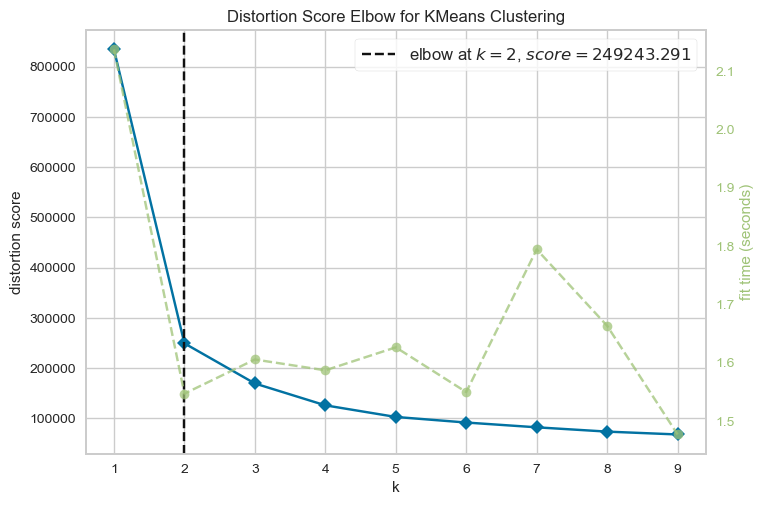

In [19]:
from yellowbrick.cluster.elbow import kelbow_visualizer
def elbow_method(X, max_range_for_elbow):
    return kelbow_visualizer(KMeans(random_state=0), X, k=(1, max_range_for_elbow))

elb = elbow_method(X,10)

In [20]:
k = elb.elbow_value_
k =3

In [21]:
cluster = KMeans(n_clusters = int(k), random_state = 2147)
labels = cluster.fit_predict(X)

passes_jug['cluster'] = labels

In [22]:
passes_jug[passes_jug.time_delta_1>5]

game_id original_event_id  period_id  time_seconds  team_id  \
4285    1650633        2446222691          1         125.0       68   
4460    1650633        2446241123          1        1394.0       68   
4487    1650633        2446244801          1        1754.0       68   
4564    1650633        2446254547          1        2377.0       68   
4665    1650633        2446272741          2         327.0       68   
...         ...               ...        ...           ...      ...   
317459  1650938        2558456083          2         411.0       68   
317579  1650938        2558462341          2        1126.0       68   
317638  1650938        2558464455          2        1388.0       68   
317707  1650938        2558466589          2        1674.0       68   
317792  1650938        2558476085          2        2602.0       68   

        player_id  start_x   end_x  start_y   end_y  ...  end_dist_to_goal_a1  \
4285     270504.0   11.340  22.995   35.292  49.572  ...           103.951090   
4460     270504.0    4.620  43.785   33.320  43.520  ...            30.841130   
4487     270504.0    5.145  57.960   29.240  63.512  ...            30.328000   
4564     270504.0    4.305  16.590   33.660  64.328  ...             7.616000   
4665     270504.0    7.875  11.865   31.076  46.580  ...            97.153952   
...           ...      ...     ...      ...     ...  ...                  ...   
317459   270504.0    7.140  26.775   34.884  24.548  ...            99.750209   
317579   270504.0    7.560  10.080   40.528  23.460  ...            50.322977   
317638   270504.0   15.225  37.065   35.836  47.532  ...           102.823821   
317707   270504.0   15.015  30.660   38.556  45.764  ...            89.725958   
317792   270504.0   12.915  12.915   39.168  24.888  ...            92.570765   

        end_angle_to_goal_a1  end_dist_to_goal_a2  end_angle_to_goal_a2  \
4285                0.004579           104.079194              0.021562   
4460                1.089399            30.841130              1.089399   
4487                1.570796            95.121518              0.045052   
4564                1.570796            22.844236              0.489648   
4665                0.052518            68.838478              0.395478   
...                      ...                  ...                   ...   
317459              0.002045            81.641528              0.164829   
317579              0.484978            58.919951              0.281857   
317638              0.068169            12.242831              0.429669   
317707              0.059907            66.710989              0.205304   
317792              0.077207            58.016734              0.317058   

       team_1 team_2 time_delta_1 time_delta_2 starting_position cluster  
4285     True   True         19.0         21.0                GK       0  
4460    False  False         24.0         26.0                GK       2  
4487    False   True         29.0         87.0                GK       1  
4564    False  False         36.0         38.0                GK       0  
4665     True   True          7.0         10.5                GK       0  
...       ...    ...          ...          ...               ...     ...  
317459   True   True          6.0          9.0                GK       0  
317579  False   True          9.0        181.0                GK       0  
317638   True  False         12.0         14.0                GK       2  
317707   True   True          6.0         10.0                GK       0  
317792   True  False          7.0         10.0                GK       0  

[305 rows x 167 columns]

In [23]:
colors = {0:"lightgreen",
            1:"skyblue",
            2: "salmon",
         3: "purple",
         4: "orange"}

passes_jug['C'] = passes_jug['cluster'].map(colors)

In [24]:
matches_rs = games[(games.home_team.str.contains("Sociedad")) | (games.away_team.str.contains("Sociedad"))].game_id.unique()

In [25]:
passes_g = passes_jug[(passes_jug.type_name == 'pass')]
passes_gc = passes_jug[(passes_jug.game_id.isin(matches_rs[-10:]))]

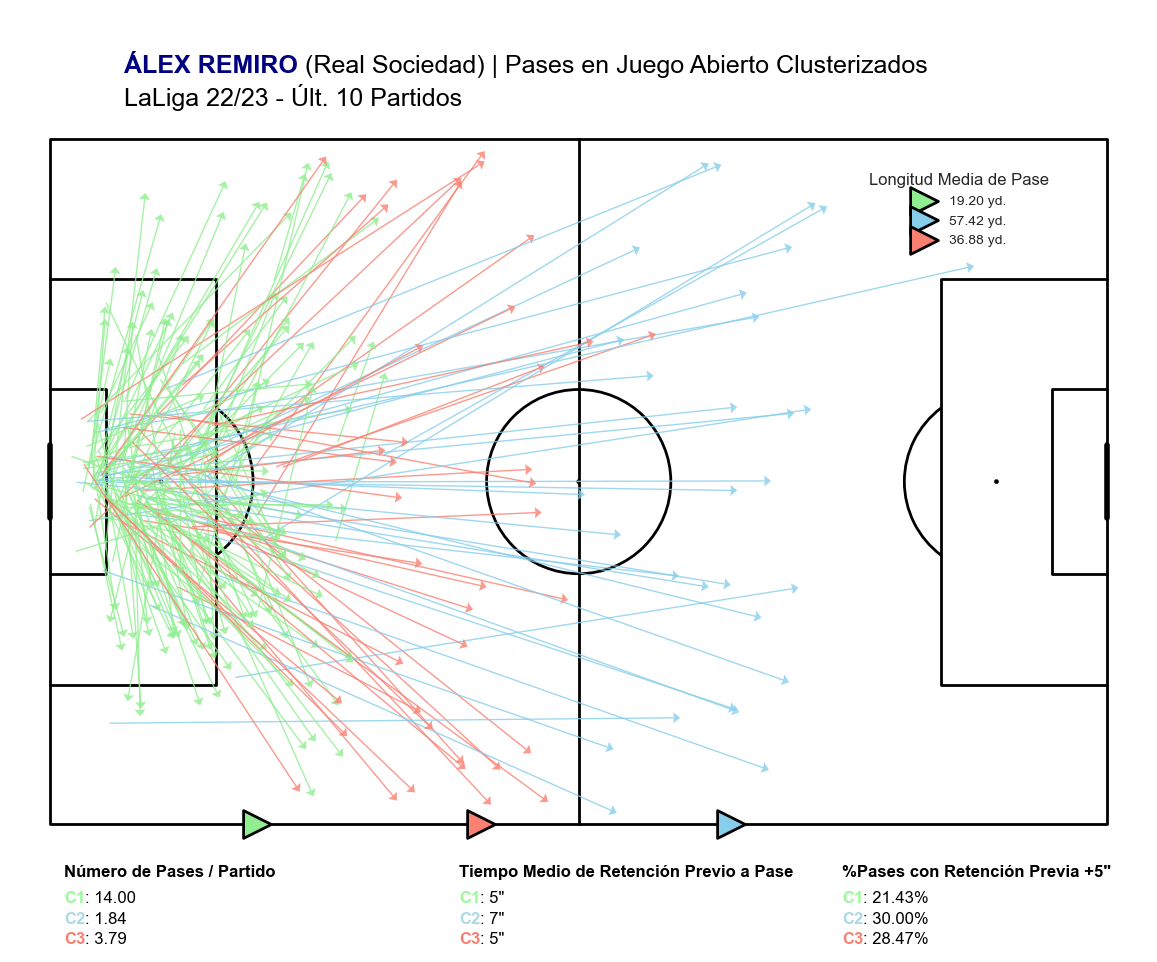

In [26]:
pitch = Pitch(line_color='black', pitch_type = "custom", pitch_length=105, pitch_width=68)
fig, axs = pitch.grid(grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

pitch.arrows(passes_gc.start_x,passes_gc.start_y,passes_gc.end_x,passes_gc.end_y,width=1,
                color=passes_gc.C,ax=axs["pitch"], alpha = .8, headwidth=8)

for i in sorted(passes_jug.cluster.unique()):
    pc = passes_g[passes_g.cluster==i]
    dist_x = pc.end_x.mean()
    mlen = pc.movement_a0.mean()
    count = pc.shape[0]
    
    pitch.scatter(dist_x, 
                  0, color= pc.C.values[0],zorder= 4, edgecolors="black",lw=2, ax= axs['pitch'], marker = ">", s = 400,
                 label = "{:.2f} yd.".format(mlen))
    

fig_text(
    x = 0.12, y = .95,
    s = "<{}> ({}) | Pases en Juego Abierto Clusterizados\nLaLiga 22/23 - Últ. {} Partidos".format(passes_g.player_name.values[0].upper(),
                                                                                  passes_g.team_name.values[0],
                                                                                  len(passes_gc.game_id.unique())),
    highlight_textprops = [
        {"color": "navy", "weight": "bold"}
    ],
    color = "black",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.4, y = .05,
    s ='<Tiempo Medio de Retención Previo a Pase>\n\n<C1>: {:.0f}"\n<C2>: {:.0f}"\n<C3>: {:.0f}"'.format(passes_g[passes_g.cluster == 0].time_delta_1.mean(),
                        passes_g[passes_g.cluster == 1].time_delta_1.mean(),
                        passes_g[passes_g.cluster == 2].time_delta_1.mean()),
    highlight_textprops = [
        {"color": "black", "weight": "bold"},
        {"color": "palegreen", "weight": "bold"},
        {"color": "lightblue", "weight": "bold"},
        {"color": "salmon", "weight": "bold"}
        
    ],
    color = "black",
    size = 12,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.72, y = .05,
    s ='<%Pases con Retención Previa +5">\n\n<C1>: {:.2%}\n<C2>: {:.2%}\n<C3>: {:.2%}'.format(passes_g[(passes_g.cluster == 0) & (passes_g.time_delta_1>5)].shape[0] / passes_g[passes_g.cluster==0].shape[0],
                        passes_g[(passes_g.cluster == 1) & (passes_g.time_delta_1>5)].shape[0] / passes_g[passes_g.cluster==1].shape[0],
                        passes_g[(passes_g.cluster == 2) & (passes_g.time_delta_1>5)].shape[0] / passes_g[passes_g.cluster==2].shape[0]),
    highlight_textprops = [
        {"color": "black", "weight": "bold"},
        {"color": "palegreen", "weight": "bold"},
        {"color": "lightblue", "weight": "bold"},
        {"color": "salmon", "weight": "bold"}
        
    ],
    color = "black",
    size = 12,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.07, y = .05,
    s ='<Número de Pases / Partido>\n\n<C1>: {:.2f}\n<C2>: {:.2f}\n<C3>: {:.2f}'.format(passes_g[(passes_g.cluster == 0)].shape[0] / len(passes_g.game_id.unique()),
                        passes_g[(passes_g.cluster == 1)].shape[0] / len(passes_g.game_id.unique()),
                        passes_g[(passes_g.cluster == 2)].shape[0] / len(passes_g.game_id.unique())),
    highlight_textprops = [
        {"color": "black", "weight": "bold"},
        {"color": "palegreen", "weight": "bold"},
        {"color": "lightblue", "weight": "bold"},
        {"color": "salmon", "weight": "bold"}
        
    ],
    color = "black",
    size = 12,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

axs['pitch'].legend(title= "Longitud Media de Pase", loc = (.75,.8))
plt.show();

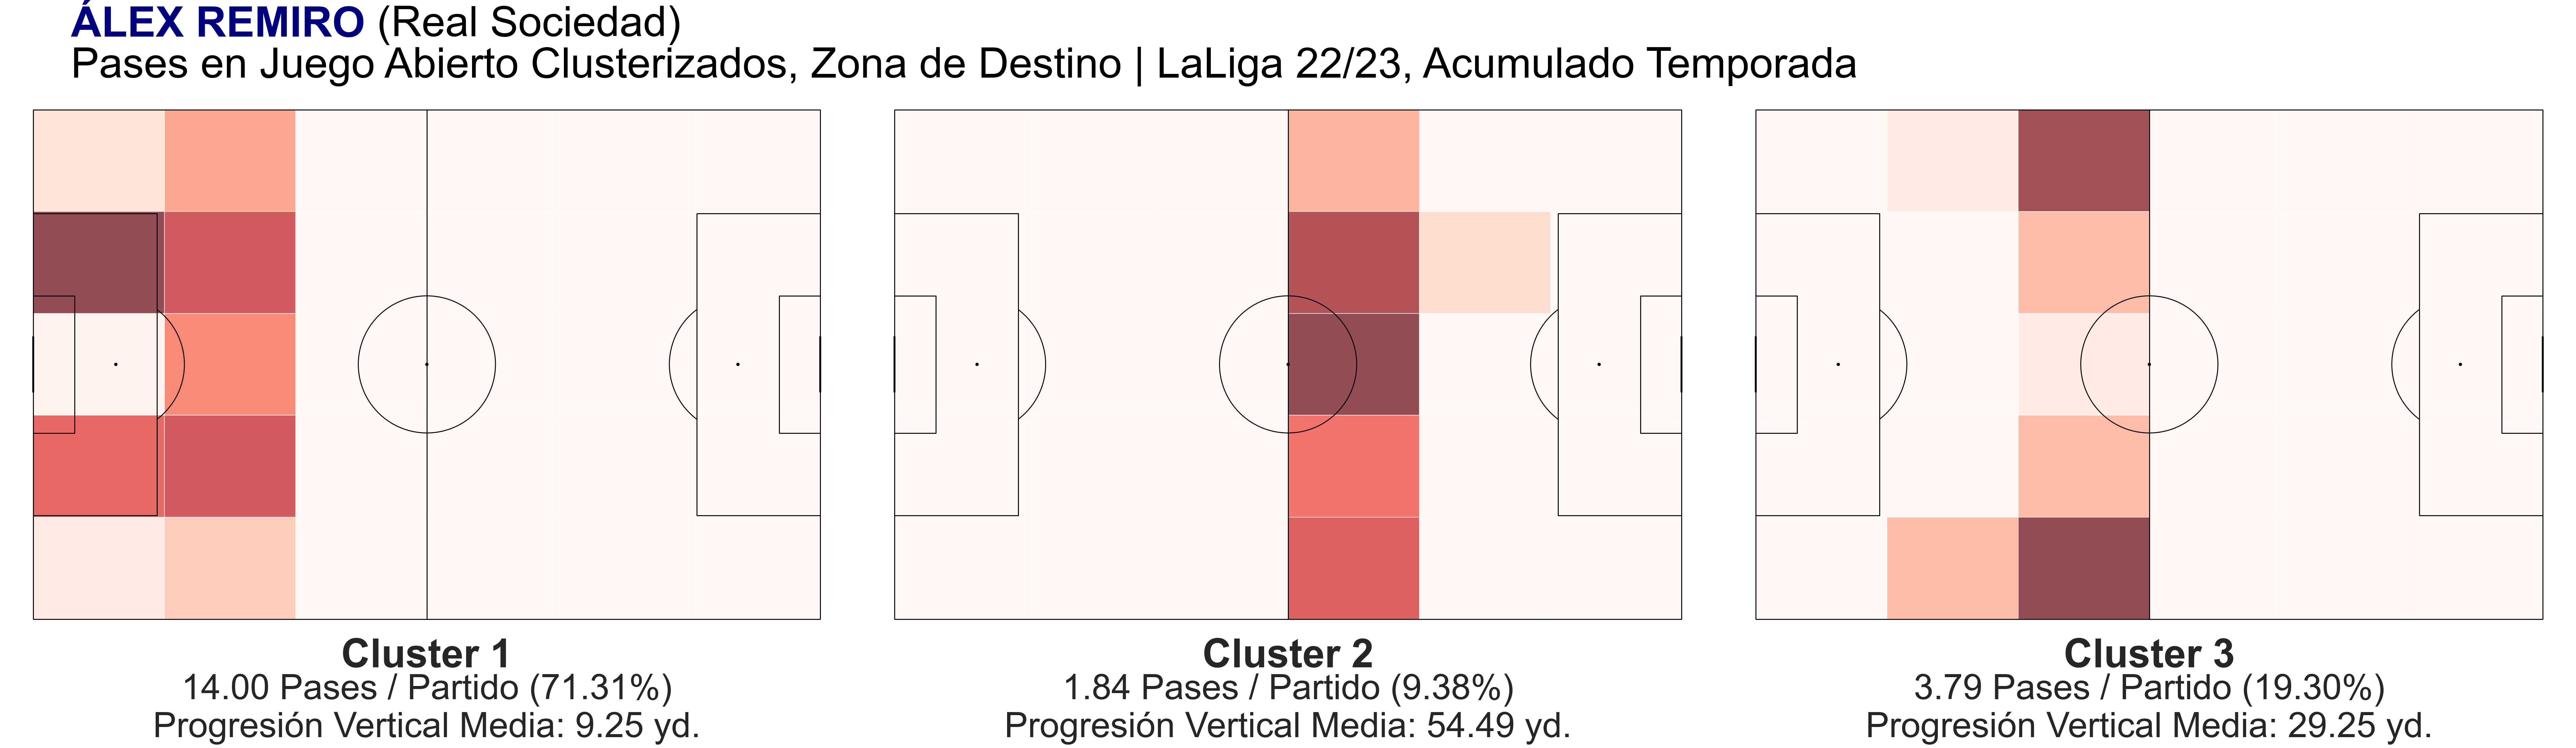

In [27]:
pitch = Pitch(line_zorder=5, line_color='black',pitch_type='uefa')
fig, axs = pitch.grid(nrows=1, ncols=3, figheight=20,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_height=0.08, grid_height=0.84)

for i, ax in enumerate(axs['pitch'].flat):
    ax.text(105/2, -5, "Cluster {}".format(i+1), ha='center', va='center', fontsize=85, weight='bold')
    ax.text(105/2, -12, "{:.2f} Pases / Partido ({:.2%})\nProgresión Vertical Media: {:.2f} yd.".format(passes_g[passes_g.cluster == i].shape[0] / len(passes_g.game_id.unique()),
                                             passes_g[passes_g.cluster == i].shape[0] / passes_g.shape[0],
                                             passes_g[passes_g.cluster == i].dx_a0.mean()), ha='center', va='center', fontsize=75)
    pl = passes_jug[passes_jug.cluster==i]
    bin_statistic = pitch.bin_statistic(pl.end_x, pl.end_y, statistic='count', bins=(6,5), normalize=False)
    pcm  = pitch.heatmap(bin_statistic, cmap='Reds', ax=ax,alpha=0.7, edgecolors='white', vmin=8)
    """
    kde = pitch.kdeplot(pl.end_x, pl.end_y, ax=ax,
                        # shade using 100 levels so it looks smooth
                        shade=True, levels=100,
                        # shade the lowest area so it looks smooth
                        # so even if there are no events it gets some color
                        shade_lowest=True,
                        cut=100,  # extended the cut so it reaches the bottom edge
                        cmap="YlOrRd")
    """
fig_text(
    x = 0.05, y = 1,
    s = "<{}> ({})\nPases en Juego Abierto Clusterizados, Zona de Destino | LaLiga 22/23, Acumulado Temporada".format(passes_g.player_name.values[0].upper(),
                                                                                  passes_g.team_name.values[0],
                                                                                  len(passes_g.game_id.unique())),
    highlight_textprops = [
        {"color": "navy", "weight": "bold"}
    ],
    color = "black",
    size = 90,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

plt.show();

In [29]:
passes_cgr = passes_c.groupby("team_name",as_index=False).dx_a0.mean().sort_values("dx_a0",ascending=True)

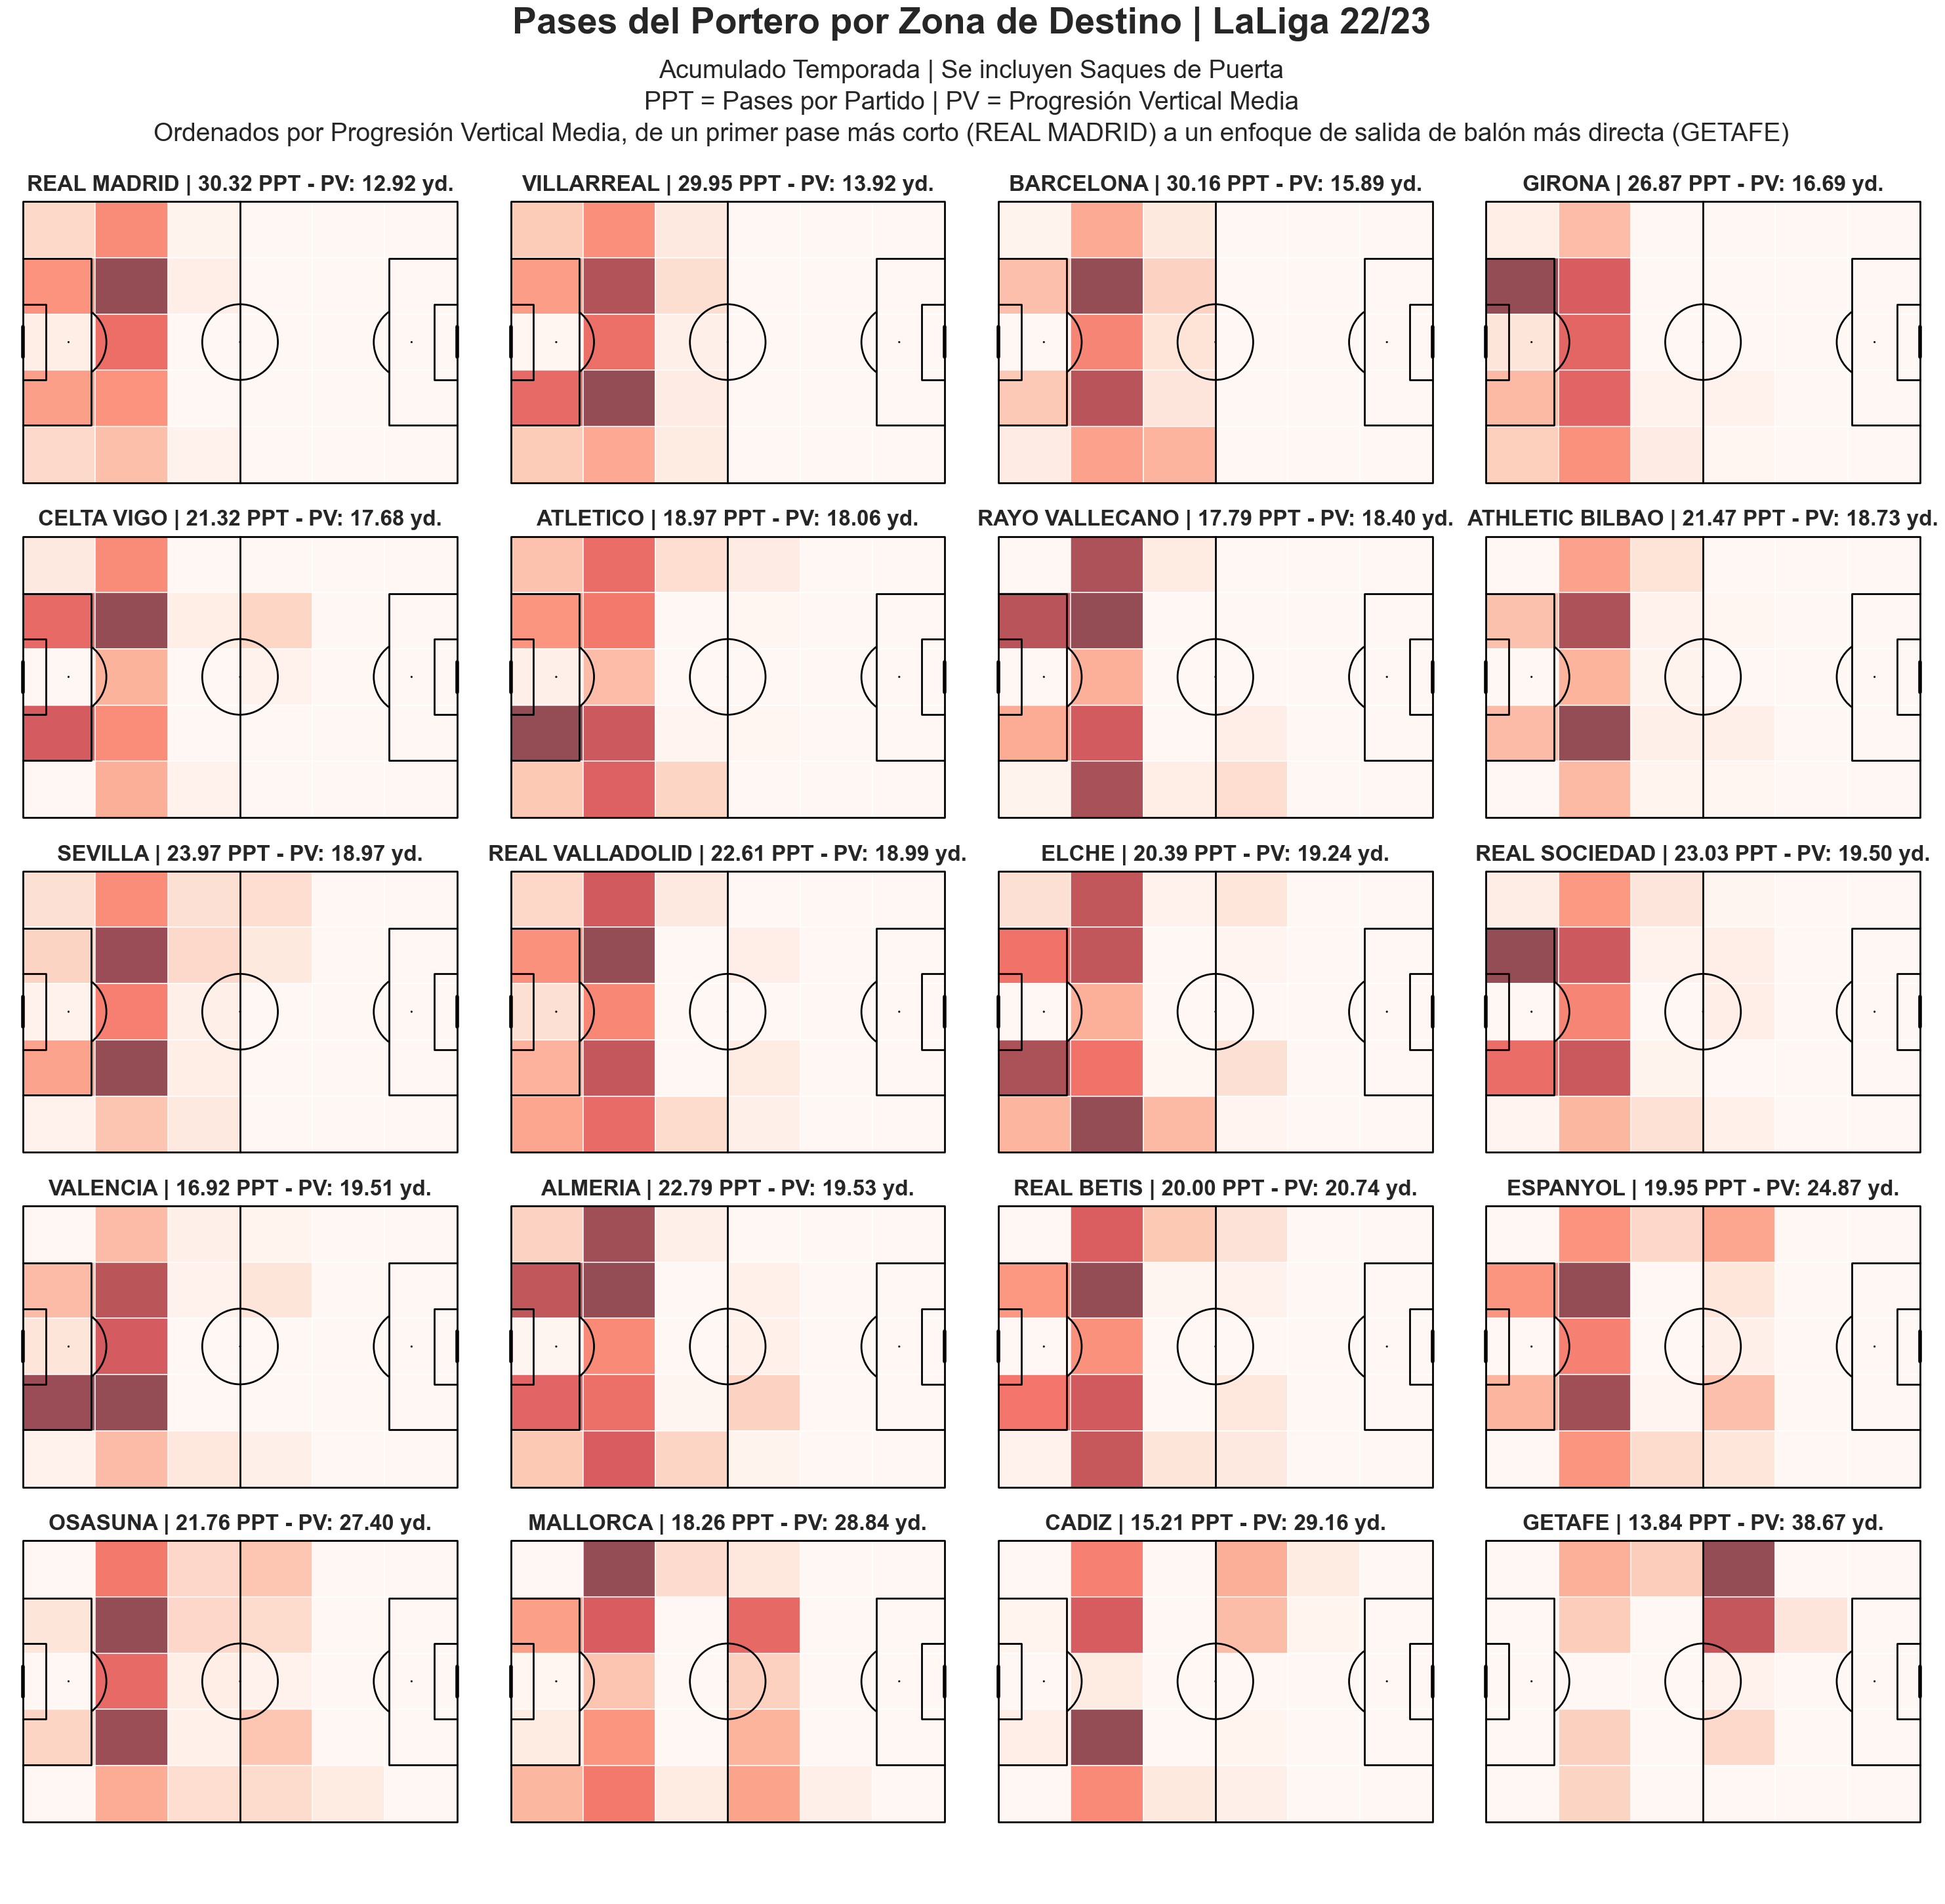

In [30]:
pitch = Pitch(line_zorder=5, line_color='black',pitch_type='uefa')
fig, axs = pitch.grid(nrows=5, ncols=4, figheight=30,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_height=0.08, grid_height=0.84)

for i, ax in enumerate(axs['pitch'].flat):
    t = passes_cgr.team_name.unique()[i]
    ax.text(105/2, 72, "{} | {:.2f} PPT - PV: {:.2f} yd.".format(t.upper(),passes_c[passes_c.team_name == t].shape[0] / len(passes_c[passes_c.team_name == t].game_id.unique()),
                                             passes_c[passes_c.team_name == t].dx_a0.mean()), ha='center', va='center', fontsize=24,
                                           weight='bold')
    pl = passes_c[passes_c.team_name==t]
    bin_statistic = pitch.bin_statistic(pl.end_x, pl.end_y, statistic='count', bins=(6,5), normalize=False)
    pcm  = pitch.heatmap(bin_statistic, cmap='Reds', ax=ax,alpha=0.7, edgecolors='white', vmin=15)

  
axs['title'].text(0.5, 0.9, "Pases del Portero por Zona de Destino | LaLiga 22/23", fontsize=40,va='center', ha='center', weight="bold")
axs['title'].text(0.5, 0.6, "Acumulado Temporada | Se incluyen Saques de Puerta", fontsize=28,va='center', ha='center')
axs['title'].text(0.5, 0.4, "PPT = Pases por Partido | PV = Progresión Vertical Media", fontsize=28,va='center', ha='center')
axs['title'].text(0.5, 0.2, "Ordenados por Progresión Vertical Media, de un primer pase más corto ({}) a un enfoque de salida de balón más directa ({})".format(passes_cgr.team_name.values[0].upper(),passes_cgr.team_name.values[-1].upper()), fontsize=28,va='center', ha='center')
plt.show();

In [31]:
X = passes_c[cols].values

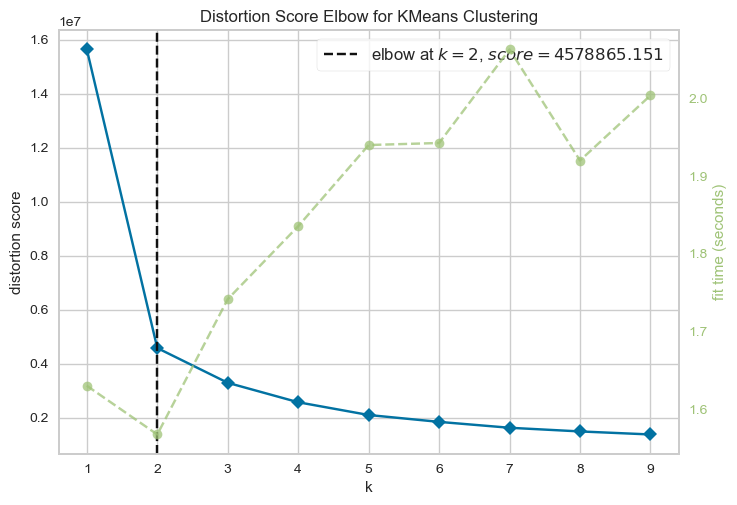

In [32]:
elb = elbow_method(X,10)
k = elb.elbow_value_
k = 3

In [33]:
cluster = KMeans(n_clusters = int(k), random_state = 2147)
labels = cluster.fit_predict(X)

passes_c['cluster'] = labels

In [34]:
passes_c['C'] = passes_c['cluster'].map(colors)

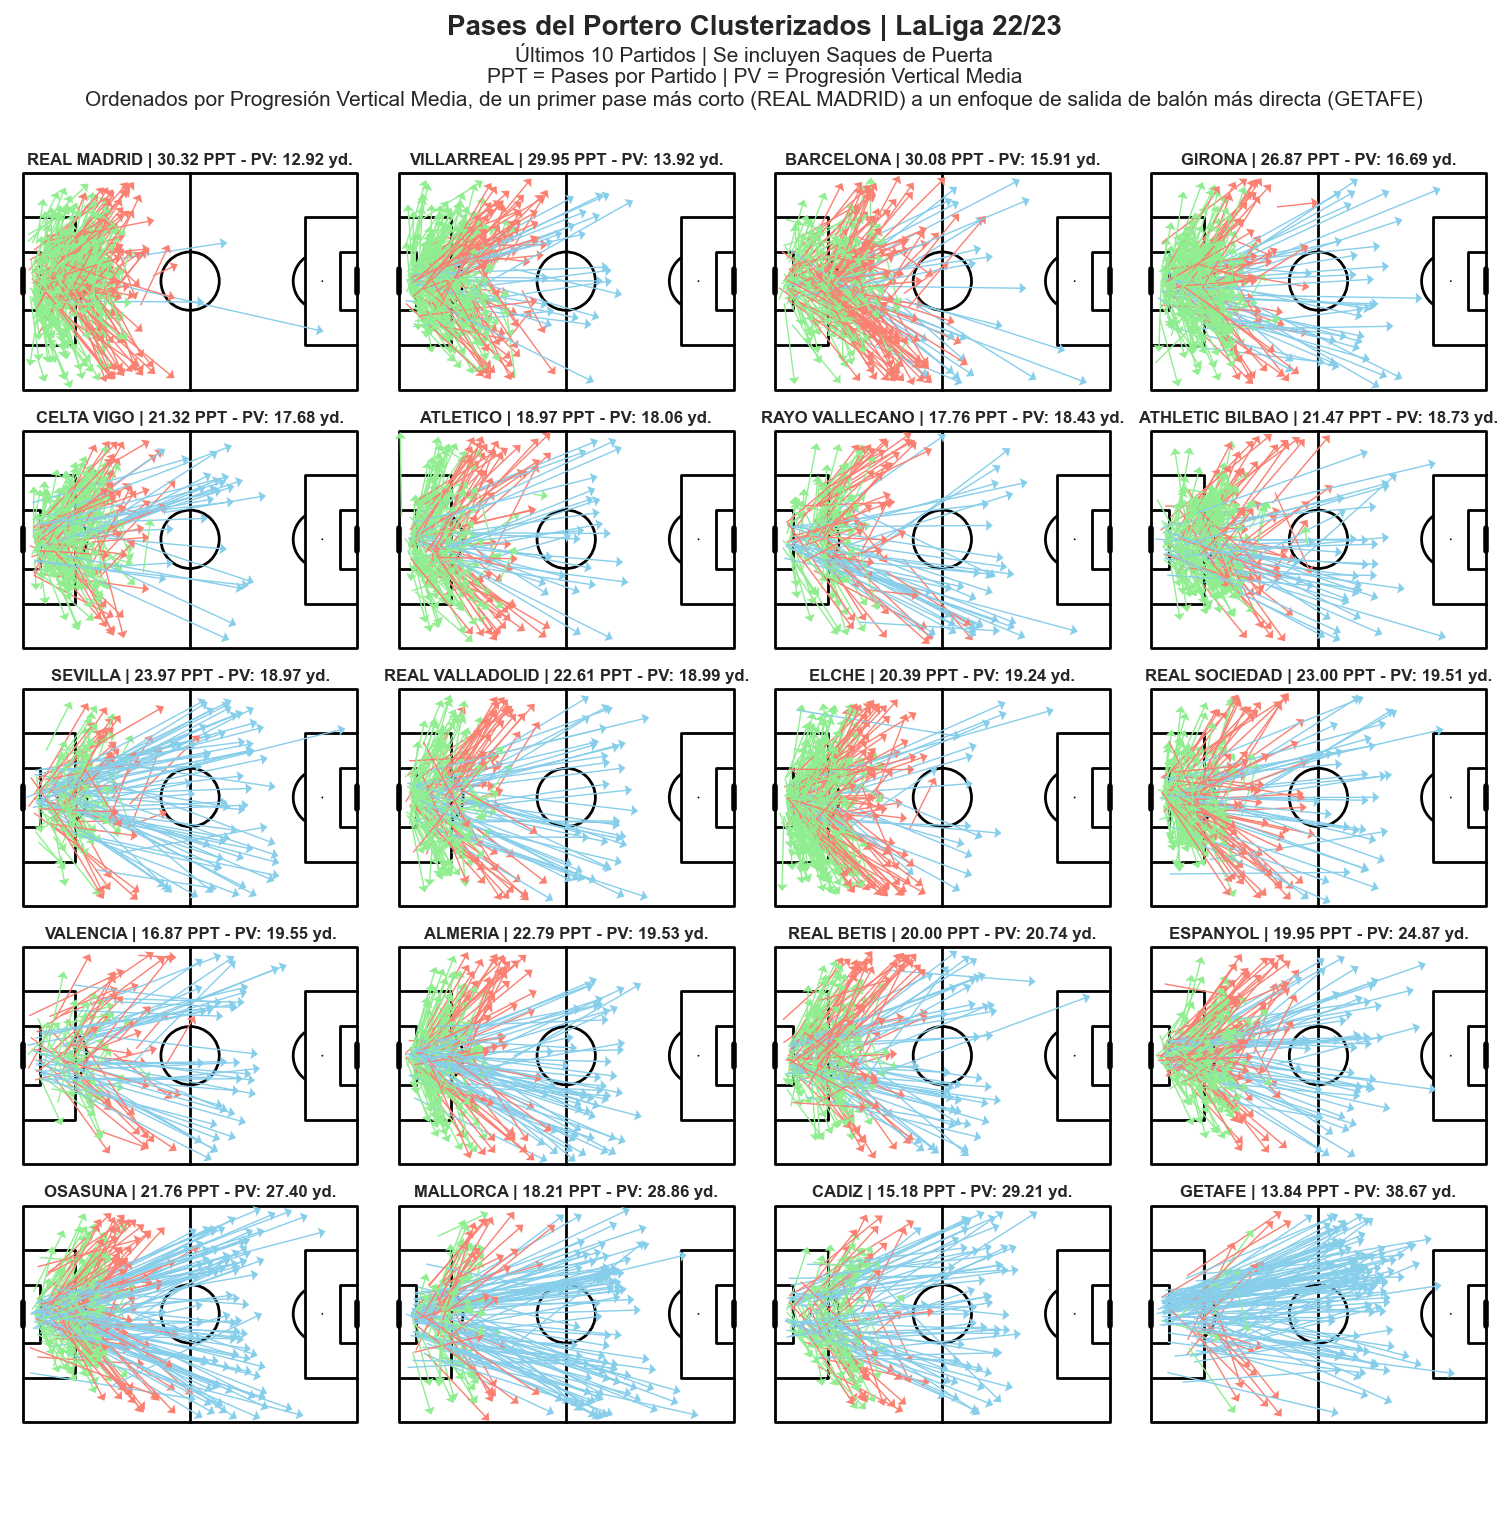

In [35]:
pitch = Pitch(line_color='black', pitch_type = "custom", pitch_length=105, pitch_width=68)
fig, axs = pitch.grid(nrows=5, ncols=4,grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01, figheight=15)

for i, ax in enumerate(axs['pitch'].flat):
    t = passes_cgr.team_name.unique()[i]
    matches_t = games[(games.home_team.str.contains( t)) | (games.away_team.str.contains( t))].game_id.unique()
    pj = passes_c[(passes_c.team_name == t) & (passes_c.start_x<= 105/2)]
    passes_gc = pj[(pj.game_id.isin(matches_t[-10:]))]
    pitch.arrows(passes_gc.start_x,passes_gc.start_y,passes_gc.end_x,passes_gc.end_y,width=1,
                    color=passes_gc.C,ax=ax, alpha = 1, headwidth=8)
    ax.text(105/2, 72, "{} | {:.2f} PPT - PV: {:.2f} yd.".format(t.upper(),pj[pj.team_name == t].shape[0] / len(pj[pj.team_name == t].game_id.unique()),
                                                 pj[pj.team_name == t].dx_a0.mean()), ha='center', va='center', fontsize=12,
                                               weight='bold')

    

axs['title'].text(0.5, 0.8, "Pases del Portero Clusterizados | LaLiga 22/23", fontsize=20,va='center', ha='center', weight="bold")
axs['title'].text(0.5, 0.5, "Últimos {} Partidos | Se incluyen Saques de Puerta".format(len(passes_gc.game_id.unique())), fontsize=15,va='center', ha='center')
axs['title'].text(0.5, 0.25, "PPT = Pases por Partido | PV = Progresión Vertical Media", fontsize=15,va='center', ha='center')
axs['title'].text(0.5, 0.00, "Ordenados por Progresión Vertical Media, de un primer pase más corto ({}) a un enfoque de salida de balón más directa ({})".format(passes_cgr.team_name.values[0].upper(),passes_cgr.team_name.values[-1].upper()), fontsize=15,va='center', ha='center')
plt.show();


In [36]:
passes_gk = passes_c[passes_c.type_name == "pass"]
passes_gk.head()

game_id original_event_id  period_id  time_seconds  team_id  player_id  \
3   1650634        2444971293          1          14.0      131   381674.0   
6   1650634        2444971419          1          24.0      131   381674.0   
19  1650634        2444972539          1         130.0       67   136220.0   
35  1650634        2444973313          1         205.0       67   136220.0   
45  1650634        2444973869          1         257.0       67   136220.0   

    start_x   end_x  start_y   end_y  ...  end_angle_to_goal_a1  \
3    16.275  22.680   34.612  17.408  ...              0.006898   
6    13.860  72.345   35.224   2.856  ...              0.013429   
19    8.505   8.610   31.688  16.456  ...              0.025309   
35    9.345  21.420   39.576   5.372  ...              0.058227   
45   15.120  25.410   31.960  43.860  ...              0.022693   

    end_dist_to_goal_a2  end_angle_to_goal_a2  team_1 team_2 time_delta_1  \
3             89.067213              0.147888    True   True          3.0   
6             95.181412              0.032869    True   True          2.5   
19            77.897356              0.102313    True   True          3.0   
35            80.404366              0.209579    True   True          3.0   
45            88.129912              0.056356    True   True          3.0   

   time_delta_2 starting_position cluster           C  
3           6.0                GK       0  lightgreen  
6           5.0                GK       1     skyblue  
19          4.0                GK       0  lightgreen  
35          5.5                GK       2      salmon  
45          6.0                GK       0  lightgreen  

[5 rows x 168 columns]

In [37]:
passes_gr = passes_gk.groupby(by="player_name", as_index=False).start_x.count().sort_values(by="start_x",ascending=True)
gks = list(passes_gr[passes_gr.start_x>100].player_name.unique())

In [38]:
passes_gr = passes_gk[passes_gk.player_name.isin(gks)].groupby(by="player_name", as_index=False).dx_a0.mean().sort_values(by="dx_a0",ascending=False)
passes_gr

player_name      dx_a0
5             David Soria  32.332876
25         Sergio Herrera  25.172575
22       Predrag Rajkovic  24.747815
1         Aitor Fernández  24.597254
19        Marko Dmitrovic  23.801966
3        Benjamin Lecomte  23.409112
14       Jeremías Ledesma  22.986423
31       Álvaro Fernández  21.523500
8        Fernando Pacheco  20.143737
15            Jordi Masip  17.465289
30            Álex Remiro  17.353854
23              Rui Silva  17.297085
7       Fernando Martínez  17.177479
4           Claudio Bravo  17.075377
6             Edgar Badia  16.755088
26     Stole Dimitrievski  16.655377
24          Sergio Asenjo  16.592485
0       Agustín Marchesín  16.341053
10   Giorgi Mamardashvili  16.315247
28             Unai Simón  16.007115
13              Jan Oblak  15.969290
20        Paulo Gazzaniga  15.509949
18  Marc-André ter Stegen  15.083584
12            Iván Villar  14.766316
29         Yassine Bounou  14.513954
17     Julen Agirrezabala  13.699512
11              Ivo Grbic  13.503974
21             Pepe Reina  13.461898
9          Gerónimo Rulli  13.154355
16     Juan Carlos Martín  12.923400
27       Thibaut Courtois  12.414774
2            Andrii Lunin  10.760647